In [56]:
# Feel free to use this notebook for any data exploration you feel is useful

import interview_test_final
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from utils.conf import file_path
from utils.statistical_tests import one_sample_t_test, two_sample_t_test, two_sample_variance_test
from util.DataLoaders import FileDataLoader
from utils.data_processing import DataFrameImputer, add_dummies

# Exploratory Data Analysis

In [3]:
data = FileDataLoader(file_path).load_data()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13599 entries, 1004889 to 1017676
Data columns (total 17 columns):
age                       13178 non-null float64
workclass                 13056 non-null object
salary                    13177 non-null float64
education_rank            13599 non-null int64
marital-status            13599 non-null object
occupation                13056 non-null object
race                      13599 non-null object
sex                       13599 non-null object
mins_beerdrinking_year    13175 non-null float64
mins_exercising_year      13178 non-null float64
works_hours               13599 non-null int64
tea_per_year              11170 non-null float64
coffee_per_year           11188 non-null float64
great_customer_class      13599 non-null int64
test                      13599 non-null int64
spent_17                  13599 non-null float64
spent_18                  13599 non-null float64
dtypes: float64(8), int64(4), object(5)
memory usage: 1.9+ MB


In [5]:
data.describe()

,age,salary,education_rank,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class,test,spent_17,spent_18
count,13178.000000,13177.000000,13599.000000,13175.000000,13178.000000,13599.000000,11170.000000,11188.000000,13599.000000,13599.000000,13599.000000,13599.000000
mean,44.842009,37149.297355,10.675417,447.920607,46.034224,39.916317,217.276544,359.708169,0.085889,0.160747,57.586659,68.252595
std,16.050574,24316.155119,2.224582,4782.134102,294.234126,9.839082,113.944411,164.680579,0.280210,0.367311,22.163776,22.149991
min,14.000000,4872.750000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-37.429405,-28.717547
25%,30.000000,20885.500000,9.000000,0.000000,0.000000,40.000000,175.000000,223.750000,0.000000,0.000000,43.188219,54.076651
50%,50.000000,25912.750000,12.000000,0.000000,0.000000,40.000000,175.000000,447.000000,0.000000,0.000000,57.586659,68.252595
75%,59.000000,48908.750000,12.000000,0.000000,0.000000,40.000000,276.000000,499.000000,0.000000,0.000000,71.659694,82.820437
max,90.000000,363858.750000,16.000000,99999.000000,3900.000000,99.000000,499.000000,499.000000,1.000000,1.000000,139.361785,152.124433


In [6]:
data.head(10)

,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class,test,spent_17,spent_18
user_id,,,,,,,,,,,,,,,,,
1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0,0,18.297024,41.664116
1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN,0,1,61.527839,79.876744
1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0,0,0,29.813543,36.155701
1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0,0,69.938808,72.754263
1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0,1,57.586659,68.252595
1022394,26.0,private,59060.50,15,Never-married,professional,caucasian,Female,0.0,0.0,30,177.0,377.0,0,1,74.030477,81.740678
1026358,58.0,private,56400.75,5,Divorced,farm,not_caucasian,Male,0.0,0.0,40,11.0,98.0,0,0,83.338088,80.094982
1026126,23.0,private,11329.25,10,Divorced,sales,caucasian,Female,0.0,0.0,40,29.0,276.0,0,0,43.180389,52.342830
1011738,14.0,private,21850.50,10,Never-married,craft,caucasian,Male,0.0,0.0,40,375.0,NaN,0,0,38.783547,32.760936


In [7]:
# Change of Spend
data['change_of_spend'] = data['spent_18'] - data['spent_17']
# Divide the data
test_group_data = data.loc[data['test'] == 1,:]
control_group_data = data.loc[data['test'] == 0,:]

(array([  64.,   66.,   58.,   65.,   57.,   67.,   68.,   82.,   65.,
          72.,   60.,   42.,   66.,   75.,   63.,   62.,   68.,   63.,
          75.,   75.,   56.,   61.,   60.,   74.,   63.,   76.,   75.,
          72.,   63.,   70.,   64.,   63.,   74.,   65.,   58.,   54.,
          64.,   54.,   60.,   68.,   52.,   67.,   70.,   49.,   66.,
          72.,   47.,   56.,   72.,   66.,   58.,   59.,   66.,   73.,
          64.,   62.,   63.,   58.,   51.,   68.,   70.,   59.,   71.,
          63.,   62.,   57.,   65.,   60.,   63.,   61.,   59.,   61.,
          78.,   64.,   65.,   61.,   70.,   65.,   62.,   65.,   71.,
          69.,   57.,   59.,   74.,   64.,   58.,   62.,   64.,   66.,
          68.,   58.,   72.,   67.,   60.,   68.,   54.,   56., 5073.,
          66.]),
 array([1000006.  , 1000494.33, 1000982.66, 1001470.99, 1001959.32,
        1002447.65, 1002935.98, 1003424.31, 1003912.64, 1004400.97,
        1004889.3 , 1005377.63, 1005865.96, 1006354.29, 1006842.62

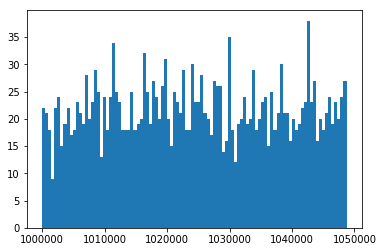

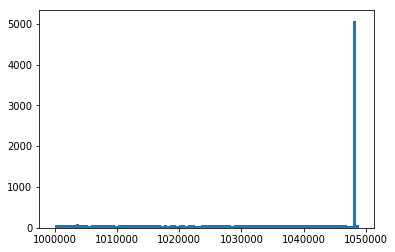

In [8]:
plt.figure()
plt.hist(test_group_data.index.values, bins = 100)
plt.figure()
plt.hist(control_group_data.index.values, bins = 100)
# why are there so many subjects in the control group who belong to the last part of the identifier?

In [9]:
# identifier 1048161
check = control_group_data.loc[1048161]
check.tail()
# this subjects have same values for all the attributes but different spend in 2017 and 2018, how so?


,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class,test,spent_17,spent_18,change_of_spend
user_id,,,,,,,,,,,,,,,,,,
1048161,59.0,self_employed,20885.5,12,Divorced,tech,caucasian,Male,0.0,0.0,40,175.0,499.0,0,0,50.814477,43.971728,-6.842748
1048161,59.0,self_employed,20885.5,12,Divorced,tech,caucasian,Male,0.0,0.0,40,175.0,499.0,0,0,83.518010,86.809723,3.291713
1048161,59.0,self_employed,20885.5,12,Divorced,tech,caucasian,Male,0.0,0.0,40,175.0,499.0,0,0,51.776356,78.009551,26.233195
1048161,59.0,self_employed,20885.5,12,Divorced,tech,caucasian,Male,0.0,0.0,40,175.0,499.0,0,0,72.684114,82.277937,9.593823
1048161,59.0,self_employed,20885.5,12,Divorced,tech,caucasian,Male,0.0,0.0,40,175.0,499.0,0,0,42.250556,53.531958,11.281402


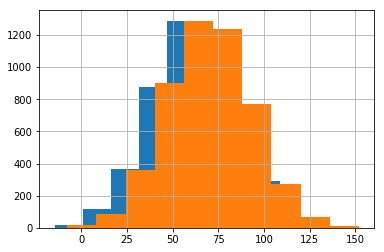

In [10]:
check['spent_17'].hist()
check['spent_18'].hist()

In [11]:
data = data.drop_duplicates()
# it does not really drop the duplicates of 1048161, because they have different spend
data = data.drop(index = 1048161)


(array([  2.,   0.,   1.,   1.,   2.,   2.,   2.,   2.,   3.,   4.,   5.,
          6.,  14.,   7.,  11.,  12.,  15.,  21.,  22.,  41.,  41.,  42.,
         59.,  51.,  56.,  77., 111.,  97., 115., 119., 154., 149., 167.,
        193., 188., 220., 190., 234., 229., 280., 272., 261., 326., 309.,
        333., 330., 369., 355., 838., 319., 330., 323., 282., 304., 289.,
        285., 252., 251., 243., 217., 186., 215., 161., 168., 166., 151.,
        127., 103., 110.,  83.,  86.,  66.,  50.,  41.,  43.,  40.,  20.,
         28.,  21.,  29.,  13.,  18.,   9.,   7.,   7.,   5.,   7.,   7.,
          3.,   2.,   1.,   1.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,
          2.]), array([-41.01146974, -39.94346817, -38.87546661, -37.80746505,
        -36.73946348, -35.67146192, -34.60346036, -33.53545879,
        -32.46745723, -31.39945566, -30.3314541 , -29.26345254,
        -28.19545097, -27.12744941, -26.05944785, -24.99144628,
        -23.92344472, -22.85544316, -21.78744159, -20.71944003,

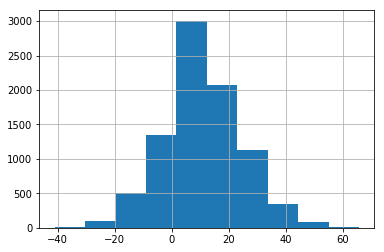

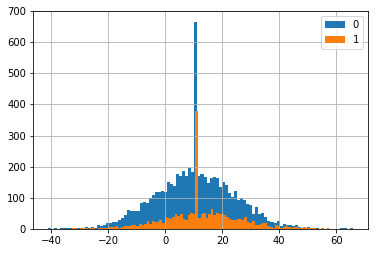

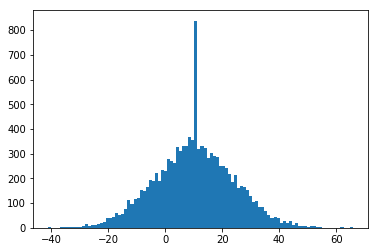

In [12]:
# overall change regardless of test
data['change_of_spend'].hist()
# group by test
plt.figure()
for test_groups , frames in data.groupby('test'):
    frames['change_of_spend'].hist(bins = 100)
    
plt.legend(data['test'].value_counts().index)   

# Why is there a spike in both histograms?
plt.figure()
result = plt.hist(control_group_data['change_of_spend'], bins = 100)
result

In [13]:
control_group_data['change_of_spend'].value_counts()
# there are duplicates even in the change of spend, who are they

check1 = control_group_data.loc[(control_group_data['change_of_spend'] >= 10.665936)  & (control_group_data['change_of_spend'] <= 10.666)
                                , :]
check1.head()

,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class,test,spent_17,spent_18,change_of_spend
user_id,,,,,,,,,,,,,,,,,,
1024759,30.0,government,NaN,14,Married,professional,not_caucasian,Male,0.0,0.0,10,208.0,37.0,0,0,57.586659,68.252595,10.665936
1007778,14.0,private,NaN,10,Never-married,cleaner,caucasian,Male,0.0,0.0,45,342.0,NaN,0,0,57.586659,68.252595,10.665936
1004725,NaN,private,32531.5,10,Married,executive,caucasian,Male,0.0,0.0,40,NaN,134.0,0,0,57.586659,68.252595,10.665936
1021749,34.0,self_employed,NaN,10,Divorced,service,caucasian,Male,0.0,NaN,80,214.0,NaN,0,0,57.586659,68.252595,10.665936
1012946,NaN,private,67820.5,7,Divorced,lawenf,caucasian,Female,0.0,0.0,20,247.0,271.0,0,0,57.586659,68.252595,10.665936


In [14]:
data['spent_17'].value_counts().iloc[0:5]

57.586659    819
46.017960      1
54.227296      1
13.996526      1
24.122211      1
Name: spent_17, dtype: int64

In [15]:
### drop the duplicates in spend

data = data.drop_duplicates(subset = ['spent_17'])

In [16]:
data['mins_exercising_year'].value_counts().iloc[0:10]

0.0       7097
1902.0      42
1887.0      28
1977.0      19
1590.0      14
1485.0      12
1876.0      12
1980.0      10
1740.0      10
1602.0       9
Name: mins_exercising_year, dtype: int64

In [17]:
# missing values
num_obs = data.shape[0]
for column in data:
    missing_ratio = sum(data[column].isna())/num_obs
    print('Percentage of missing values in column {} is {} '.format(column, missing_ratio))

Percentage of missing values in column age is 0.0 
Percentage of missing values in column workclass is 0.062210796915167094 
Percentage of missing values in column salary is 0.00012853470437017994 
Percentage of missing values in column education_rank is 0.0 
Percentage of missing values in column marital-status is 0.0 
Percentage of missing values in column occupation is 0.062210796915167094 
Percentage of missing values in column race is 0.0 
Percentage of missing values in column sex is 0.0 
Percentage of missing values in column mins_beerdrinking_year is 0.04832904884318766 
Percentage of missing values in column mins_exercising_year is 0.0487146529562982 
Percentage of missing values in column works_hours is 0.0 
Percentage of missing values in column tea_per_year is 0.2799485861182519 
Percentage of missing values in column coffee_per_year is 0.2776349614395887 
Percentage of missing values in column great_customer_class is 0.0 
Percentage of missing values in column test is 0.0 

In [18]:
## should I impute tea and coffee missing values?

tea_missing = data.loc[data['tea_per_year'].isna(),:]
tea_missing

,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class,test,spent_17,spent_18,change_of_spend
user_id,,,,,,,,,,,,,,,,,,
1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0,0,69.938808,72.754263,2.815455
1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0,1,57.586659,68.252595,10.665936
1041701,18.0,private,15245.25,10,Never-married,sales,caucasian,Female,2176.0,0.0,35,NaN,159.0,0,0,46.695180,59.013024,12.317844
1033665,35.0,private,80048.00,2,Married,service,caucasian,Female,0.0,0.0,40,NaN,NaN,0,1,55.001874,71.139047,16.137173
1036508,40.0,NaN,16386.25,14,Divorced,NaN,caucasian,Female,0.0,0.0,55,NaN,177.0,0,0,85.720518,94.431771,8.711253
1040534,44.0,private,17187.00,10,Married,sales,caucasian,Male,0.0,0.0,48,NaN,274.0,0,1,70.217574,96.664555,26.446981
1015941,19.0,private,28195.00,10,Never-married,sales,caucasian,Female,0.0,0.0,20,NaN,130.0,0,0,60.541696,90.143768,29.602072
1031332,35.0,private,70241.50,10,Married,sales,caucasian,Male,0.0,0.0,40,NaN,185.0,0,1,62.846785,59.033166,-3.813620
1022771,51.0,private,34713.00,9,Married,craft,caucasian,Male,0.0,0.0,40,NaN,183.0,0,0,44.720647,41.383356,-3.337291


c:\users\ying-fang.kao\appdata\local\conda\conda\envs\myenv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\ying-fang.kao\appdata\local\conda\conda\envs\myenv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


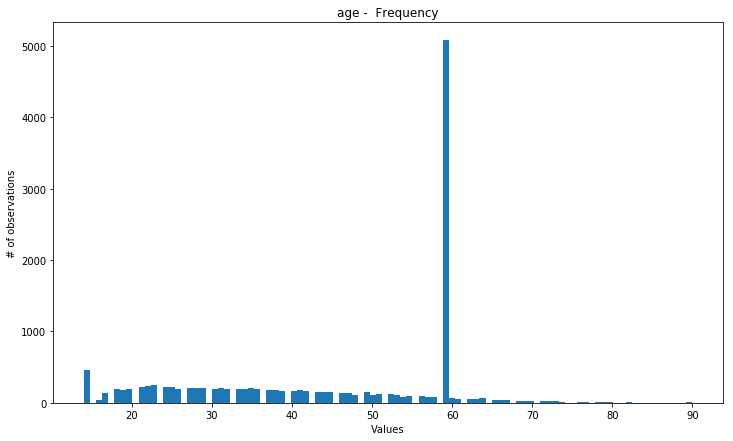

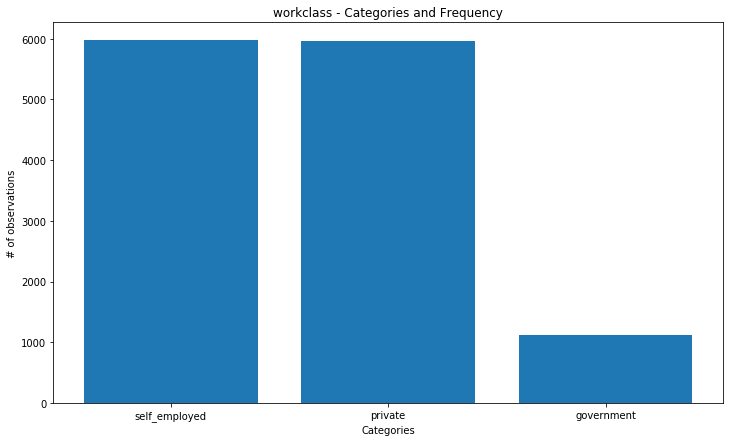

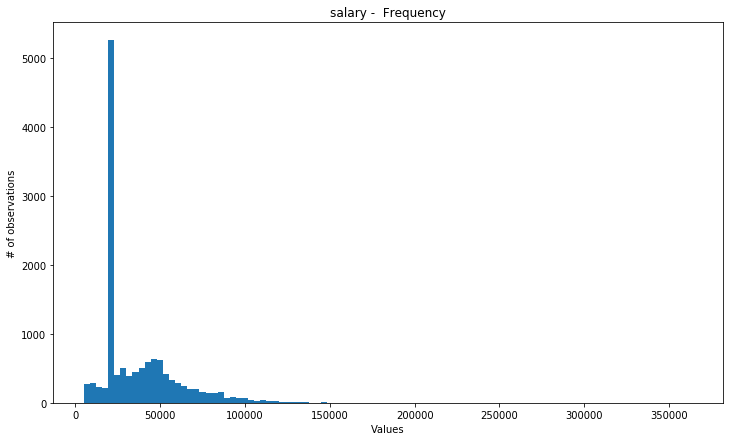

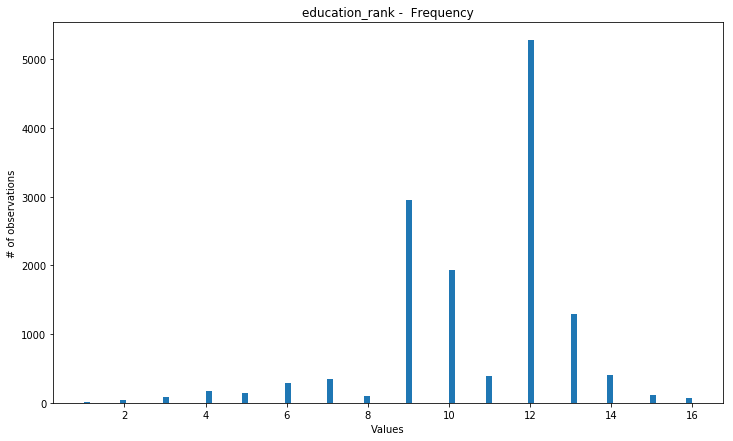

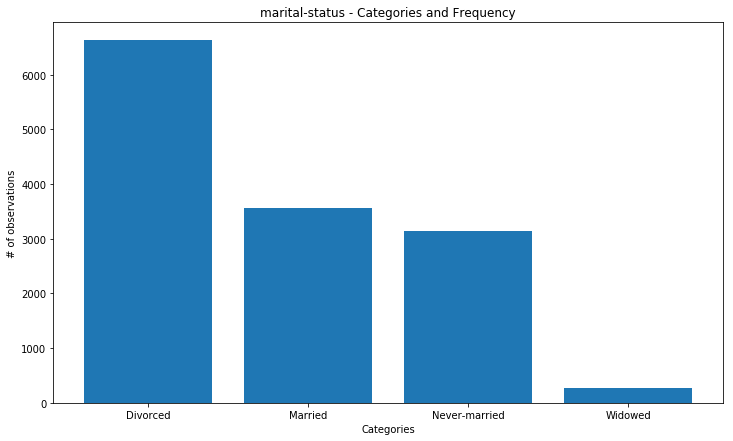

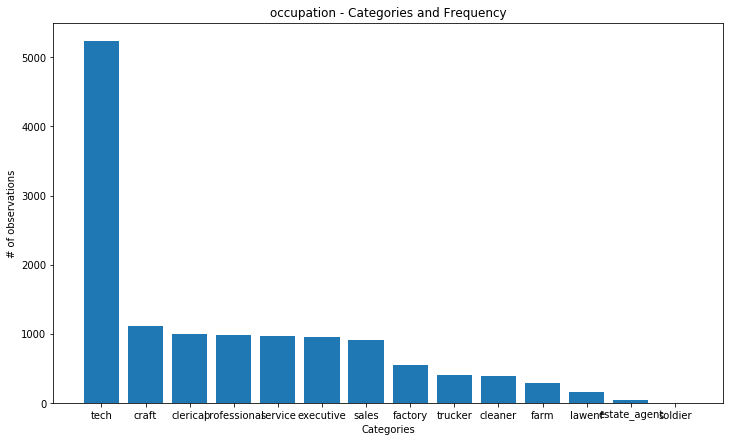

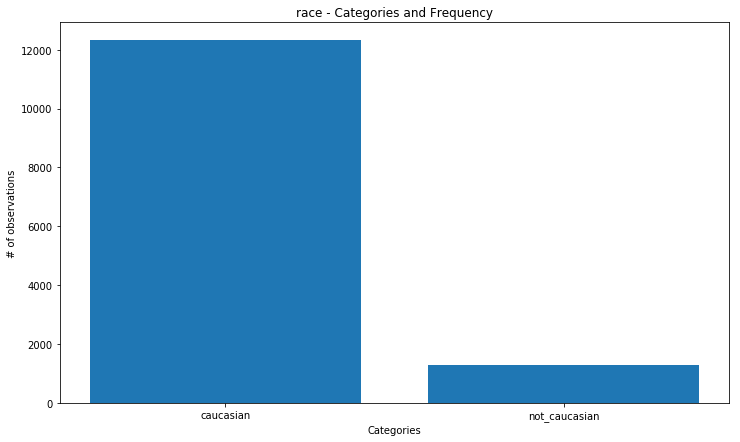

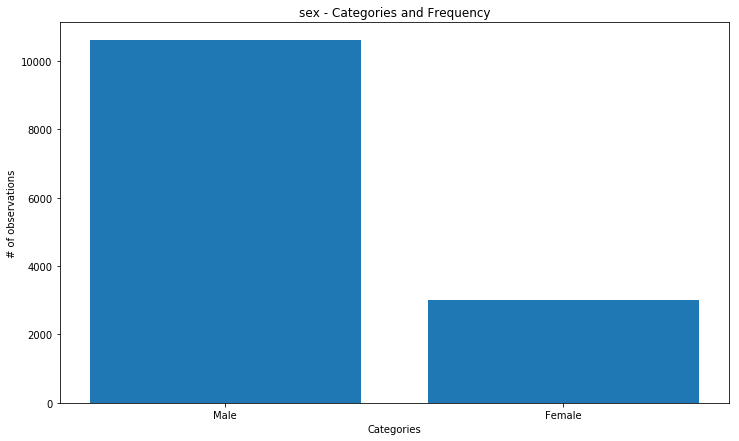

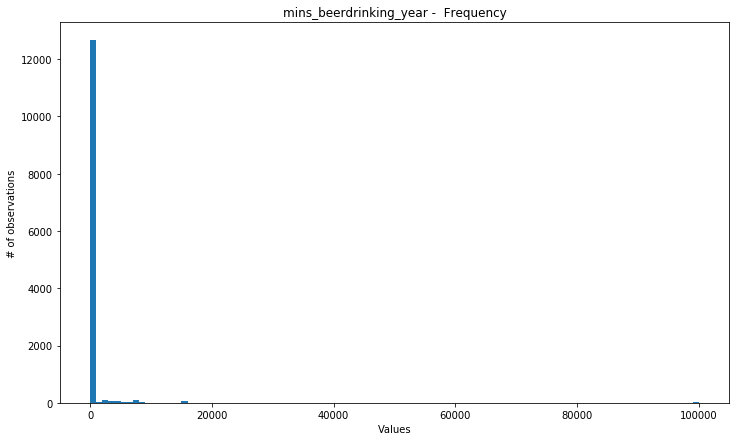

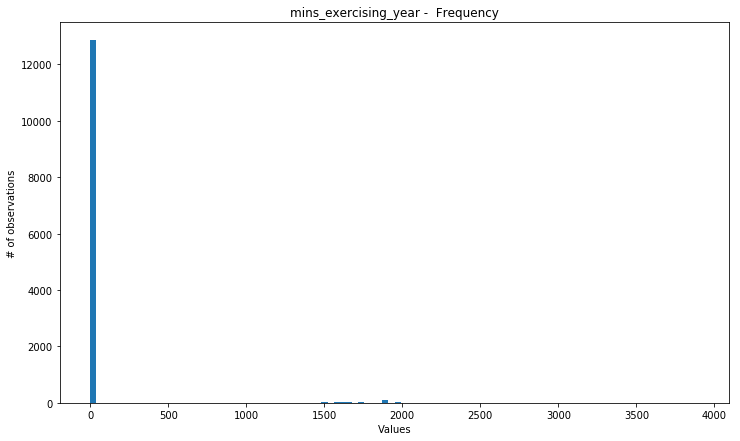

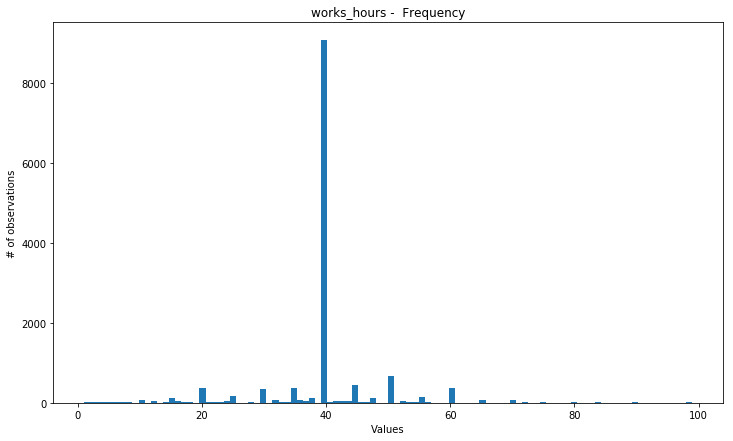

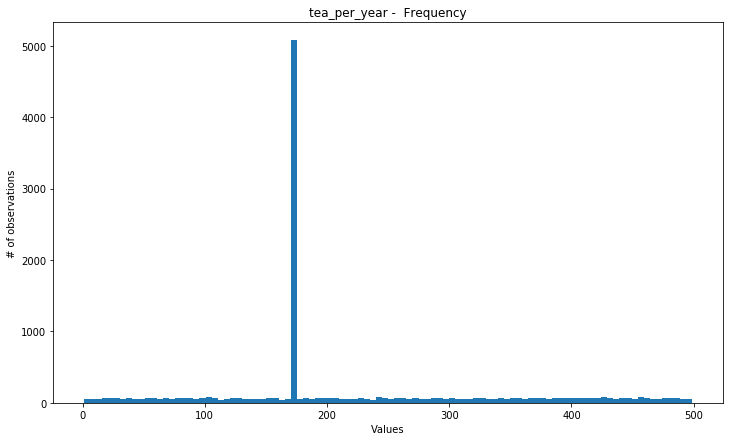

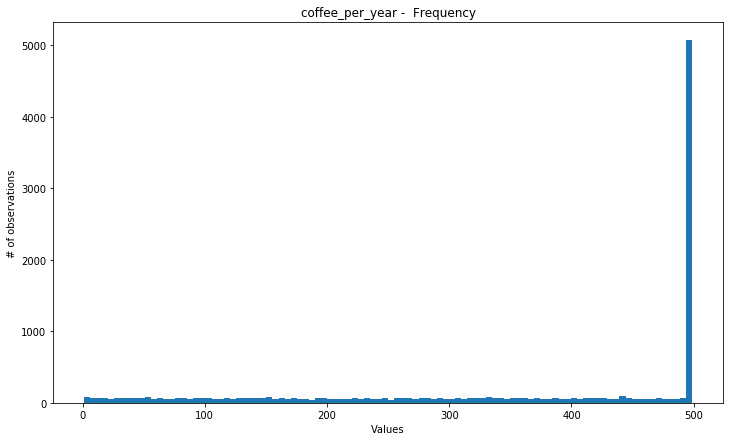

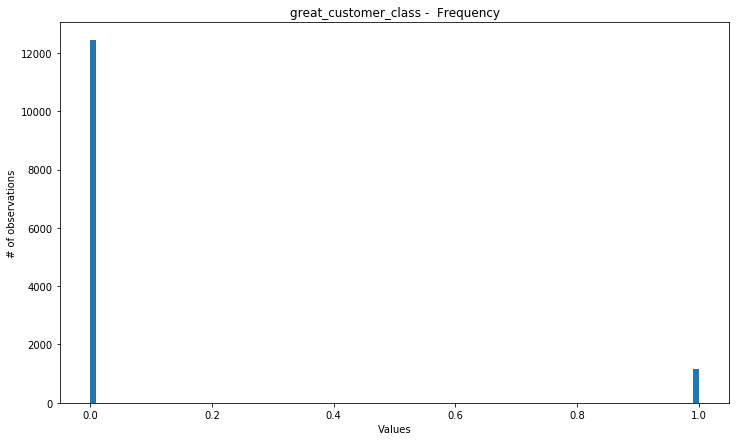

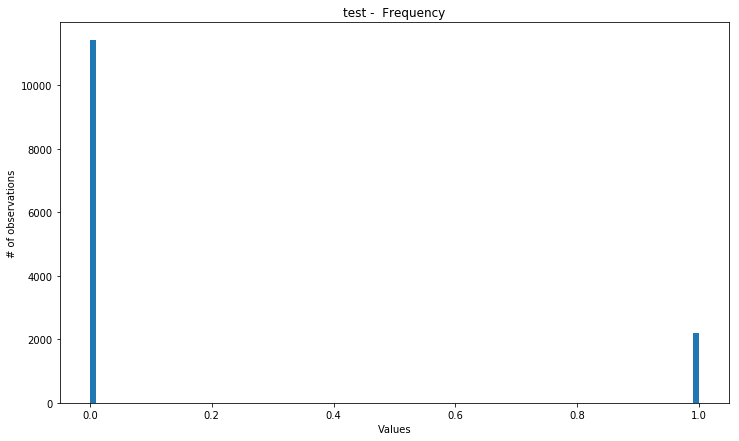

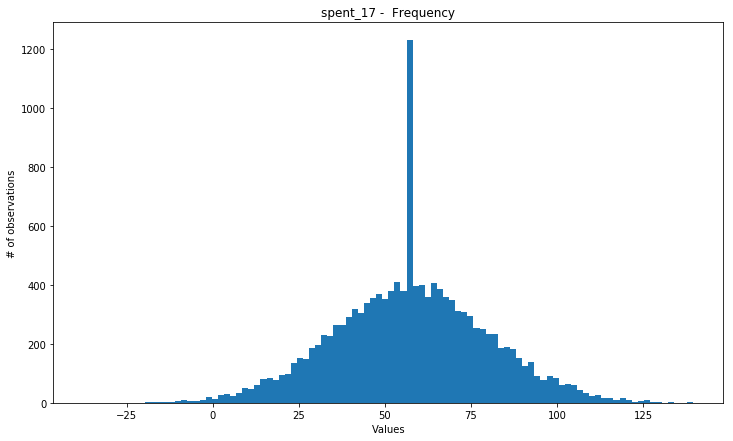

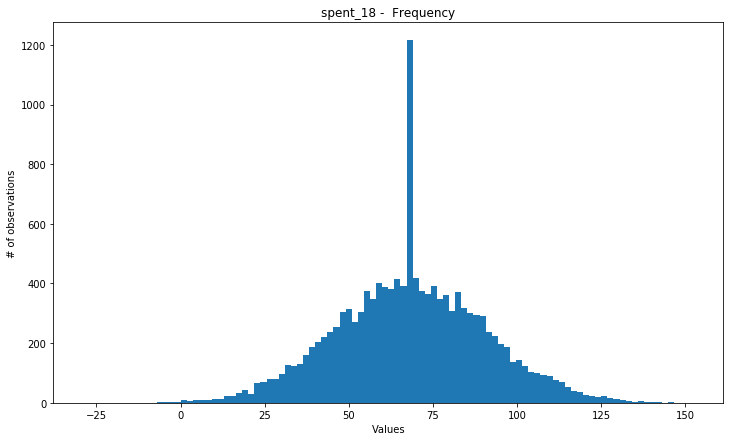

In [8]:
# Data Distributions Visualisation
category_columns = []
for column in data:
    if data.dtypes[column] == 'object':
        category_columns.append(column)
        
for column in data:
    if column in category_columns:
        plt.figure(figsize = (12,7))
        plt.title('{} - Categories and Frequency'.format(column))
        plt.xlabel('Categories')
        plt.ylabel('# of observations')
        value_counts = data[column].value_counts()
        plt.bar(value_counts.index, value_counts)
        
    else:
        plt.figure(figsize = (12,7))
        plt.title('{} -  Frequency'.format(column))
        plt.xlabel('Values')
        plt.ylabel('# of observations')
        plt.hist(data[column], bins = 100)

In [20]:
# there is a big group of very young users?

check_age = data.loc[data['age'] == data['age'].min(),:]
check_age

,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class,test,spent_17,spent_18,change_of_spend
user_id,,,,,,,,,,,,,,,,,,
1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0,0,18.297024,41.664116,23.367092
1011738,14.0,private,21850.50,10,Never-married,craft,caucasian,Male,0.0,0.0,40,375.0,NaN,0,0,38.783547,32.760936,-6.022612
1027830,14.0,private,49160.75,10,Never-married,service,caucasian,Male,0.0,0.0,20,478.0,NaN,0,0,78.143710,73.063757,-5.079953
1002039,14.0,private,68557.00,9,Never-married,service,caucasian,Male,0.0,0.0,65,342.0,NaN,0,0,20.208347,5.974147,-14.234200
1011561,14.0,NaN,65903.00,9,Never-married,NaN,not_caucasian,Female,0.0,0.0,40,200.0,NaN,0,0,64.275327,102.001518,37.726191
1034030,14.0,private,27592.75,8,Never-married,factory,caucasian,Male,0.0,0.0,40,230.0,NaN,0,0,73.332927,70.184528,-3.148399
1002819,14.0,private,40921.75,10,Married,executive,caucasian,Male,0.0,0.0,50,198.0,NaN,0,0,69.797033,78.282811,8.485778
1035385,14.0,private,50825.25,9,Never-married,clerical,caucasian,Female,0.0,0.0,40,466.0,NaN,0,0,94.185282,89.389609,-4.795673
1017854,14.0,private,31066.25,10,Never-married,cleaner,caucasian,Male,0.0,0.0,40,426.0,NaN,0,0,89.937477,81.674551,-8.262926


In [90]:
data['age'].value_counts().sort_index()

14.0    443
16.0     44
17.0    124
18.0    181
19.0    166
20.0    183
21.0    209
22.0    218
23.0    230
24.0    208
25.0    209
26.0    189
27.0    199
28.0    191
29.0    198
30.0    182
31.0    190
32.0    190
33.0    187
34.0    182
35.0    191
36.0    190
37.0    180
38.0    171
39.0    153
40.0    163
41.0    177
42.0    157
43.0    145
44.0    146
       ... 
58.0     75
59.0     75
60.0     62
61.0     59
62.0     51
63.0     51
64.0     63
65.0     45
66.0     30
67.0     31
68.0     26
69.0     22
70.0     21
71.0     21
72.0     19
73.0     19
74.0     10
75.0      3
76.0     11
77.0      9
78.0      7
79.0      5
80.0     10
81.0      3
82.0      5
83.0      1
84.0      2
85.0      3
88.0      2
90.0      5
Name: age, Length: 73, dtype: int64

In [21]:
# Be a little selective age 18:80
data = data.loc[(data['age']>=18) & (data['age']<= 80), :]

## Data Cleansing

In [10]:
import interview_test_final
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from utils.conf import file_path
from utils.statistical_tests import one_sample_t_test, two_sample_t_test, two_sample_variance_test
from util.DataLoaders import FileDataLoader
from utils.data_processing import DataFrameImputer, add_dummies

data = FileDataLoader(file_path).load_data()

In [3]:
def data_cleansing(data):
    ''''''
    new_data = data.copy()
    new_data = new_data.drop_duplicates()
    # it does not really drop the duplicates of 1048161, because they have different spend
    new_data = new_data.drop(index = 1048161)
    # drop duplicate spend
    new_data = new_data.drop_duplicates(subset = ['spent_17'])
    # drop some ages
    new_data = new_data.loc[(new_data['age']>=18) & (new_data['age']<= 80), :]
    # impute categorical with the most frequent, and others with mean
    new_data = DataFrameImputer().fit_transform(new_data)
    return new_data

In [6]:
new_data = data_cleansing(data)
num_obs = new_data.shape[0]
for column in new_data:
    missing_ratio = sum(new_data[column].isna())/num_obs
    print('Percentage of missing values in column {} is {} '.format(column, missing_ratio))

Percentage of missing values in column age is 0.0 
Percentage of missing values in column workclass is 0.0 
Percentage of missing values in column salary is 0.0 
Percentage of missing values in column education_rank is 0.0 
Percentage of missing values in column marital-status is 0.0 
Percentage of missing values in column occupation is 0.0 
Percentage of missing values in column race is 0.0 
Percentage of missing values in column sex is 0.0 
Percentage of missing values in column mins_beerdrinking_year is 0.0 
Percentage of missing values in column mins_exercising_year is 0.0 
Percentage of missing values in column works_hours is 0.0 
Percentage of missing values in column tea_per_year is 0.0 
Percentage of missing values in column coffee_per_year is 0.0 
Percentage of missing values in column great_customer_class is 0.0 
Percentage of missing values in column test is 0.0 
Percentage of missing values in column spent_17 is 0.0 
Percentage of missing values in column spent_18 is 0.0 


correlation coefficient of spend and change_of_spend is [[ 1.         -0.31678062]
 [-0.31678062  1.        ]]


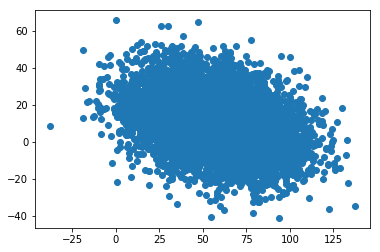

In [25]:
# Can change of spend be negatively correlated with spent_17 ?
#(beyond a saturation point, one will not spend more even with marketing?)
new_data['change_of_spend'] = new_data['spent_18'] - new_data['spent_17']
plt.scatter(new_data['spent_17'], new_data['change_of_spend'])

print('correlation coefficient of spend and change_of_spend is {}'.format(new_data[['spent_17','change_of_spend']].corr().values))

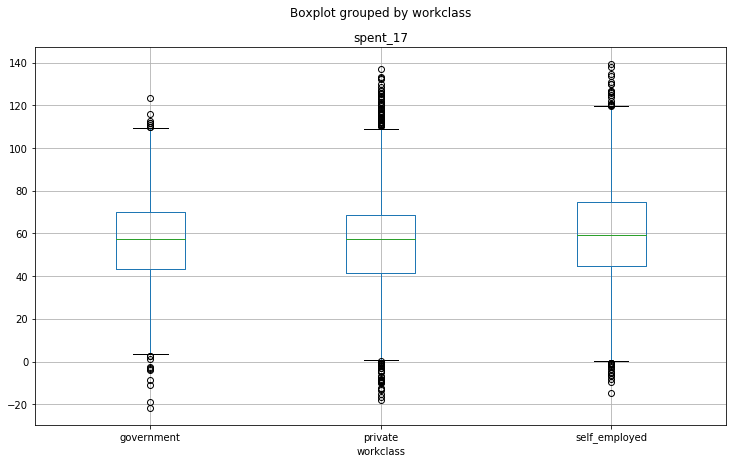

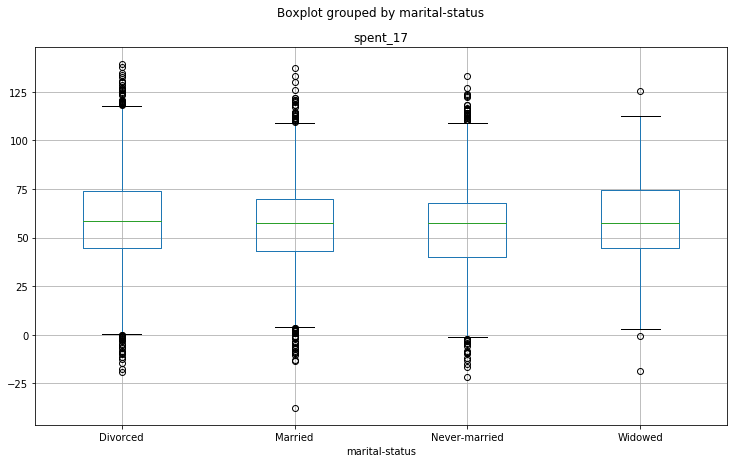

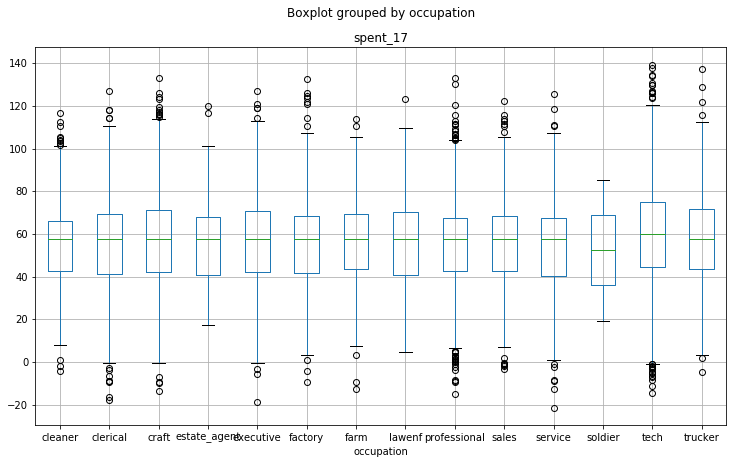

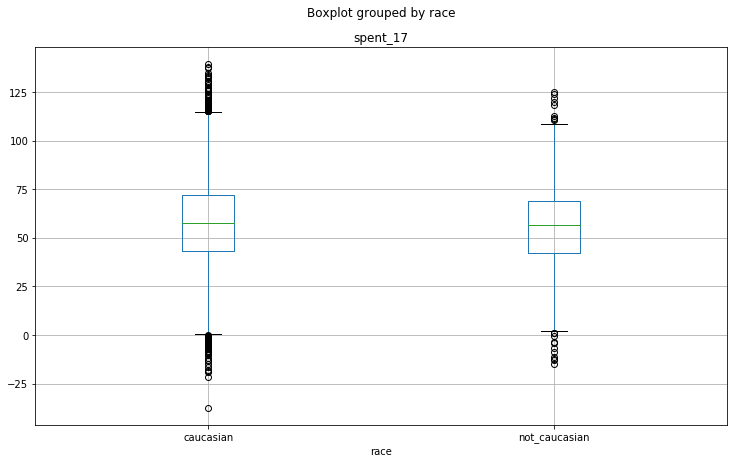

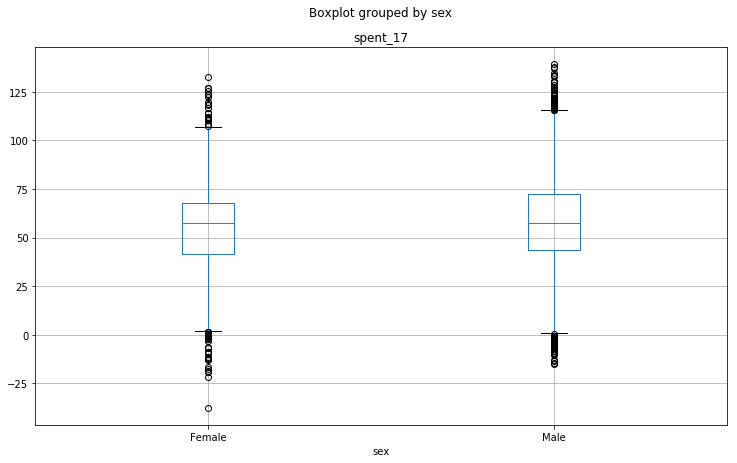

In [26]:
# How do spend differ when looking at different user attributes
for column in category_columns:
    data.boxplot(column = 'spent_17', by = column, figsize = (12,7))

# Part A: Programming and Machine Learning

In [ ]:
'''
Use Python (preferably 3) please, that is what the team works in and we can’t accept submissions
 written in other languages.
 
 There is some existing code (only a couple classes) that we would like you to use. Use the abstract
classes provided for your models and data loader.


Write a unit test for something. We don’t really mind what, even if you just write a test for the
###checking the file exists or loading it, we’ll be happy.

Predict the binary class ‘great_customer_class’ using two prediction models. Use a random forest,
then afterwards a second approach of your choice. This could be something to show your knowledge
about problem datasets like support vector machines, or could be something fancy like NN.

Determine ways to evaluate your prediction model.
Outline any concerns with the data and how you approached them.

Explain the dominant features for classifiers if it’s possible.
'''

In [12]:
from sklearn.ensemble import RandomForestClassifier

# pilot 
dummy_list = category_columns + ['test']
exclude_columns =['mins_beerdrinking_year', 'mins_exercising_year', 'tea_per_year','coffee_per_year', 'spent_18', 'great_customer_class']

features = new_data.drop(columns = exclude_columns)
features = add_dummies(features, dummy_list)
target = new_data['great_customer_class']

RF = RandomForestClassifier(100, criterion = 'entropy', max_depth = 50, min_samples_split = 30, min_samples_leaf = 5, 
                           bootstrap = False)

RF.fit(features, target)
accuracy = RF.score(features, target)
print('accuracy is {}'.format(accuracy))

accuracy is 0.910464465584779


In [24]:
from sklearn.model_selection import train_test_split, cross_validate

# randomly generate a test set (10%)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, stratify = target)

# use cross validation to compare a few hyperparameters
number_of_trees = [100, 500, 1000]
criterions = ['entropy','gini']
max_depths = [10, 30, 50]
min_samples_splits = [5,15,30]
min_samples_leaves = [1,5,10]
bootstraps = [True, False]

hyperparameter_score = pd.DataFrame([], columns = 
                                    ['number_of_trees','criterions','max_depths','min_samples_splits','min_samples_leaves', 'bootstraps', 'score'])
i = 0
for number_of_tree in number_of_trees:
    for criterion in criterions:
        for max_depth in max_depths:
            for min_samples_split in min_samples_splits:
                for min_samples_leaf in min_samples_leaves:
                    for bootstrap in bootstraps:
                        RF = RandomForestClassifier(number_of_tree, criterion = criterion, max_depth = max_depth, 
                                                    min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, bootstrap = bootstrap)
                        scores = cross_validate(RF, features_train, target_train,  
                                                scoring = 'f1_macro', cv=5, n_jobs=4, return_train_score = False)
                        hyperparameter_score.loc[i,:] = [number_of_tree, criterion, max_depth, min_samples_split, min_samples_leaf, bootstrap, scores]
                        i = i + 1






In [32]:
# Best parameters
hyperparameter_score['test_score']= hyperparameter_score['score'].apply(lambda x: x['test_score'].mean())
hyperparameter_score = hyperparameter_score.sort_values(by = 'test_score', ascending = False)
hyperparameter_score.head()

,number_of_trees,criterions,max_depths,min_samples_splits,min_samples_leaves,bootstraps,score,test_score
234,1000,entropy,30,5,1,True,"{'fit_time': [6.479385614395142, 6.95541572570...",0.721655
97,100,gini,50,15,1,False,"{'fit_time': [0.734044075012207, 0.73004245758...",0.720595
240,1000,entropy,30,15,1,True,"{'fit_time': [6.726405382156372, 6.04435968399...",0.720210
253,1000,entropy,50,5,1,False,"{'fit_time': [10.762645959854126, 11.153665065...",0.719731
306,1000,gini,50,5,1,True,"{'fit_time': [5.277311086654663, 4.70827484130...",0.719631


In [41]:
## Use the whole training set
parameters = hyperparameter_score.iloc[0]

RF = RandomForestClassifier(parameters['number_of_trees'], criterion = parameters['criterions'], 
                            max_depth = parameters['max_depths'], min_samples_split = parameters['min_samples_splits'],
                           min_samples_leaf = parameters['min_samples_leaves'], bootstrap = parameters['bootstraps'])
RF.fit(features, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
from sklearn.metrics import classification_report
## Prediction
target_pred = RF.predict(features_test)
# metrics
report = classification_report(target_test, target_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       608
           1       0.99      0.84      0.91       107

   micro avg       0.97      0.97      0.97       715
   macro avg       0.98      0.92      0.95       715
weighted avg       0.98      0.97      0.97       715



<BarContainer object of 32 artists>

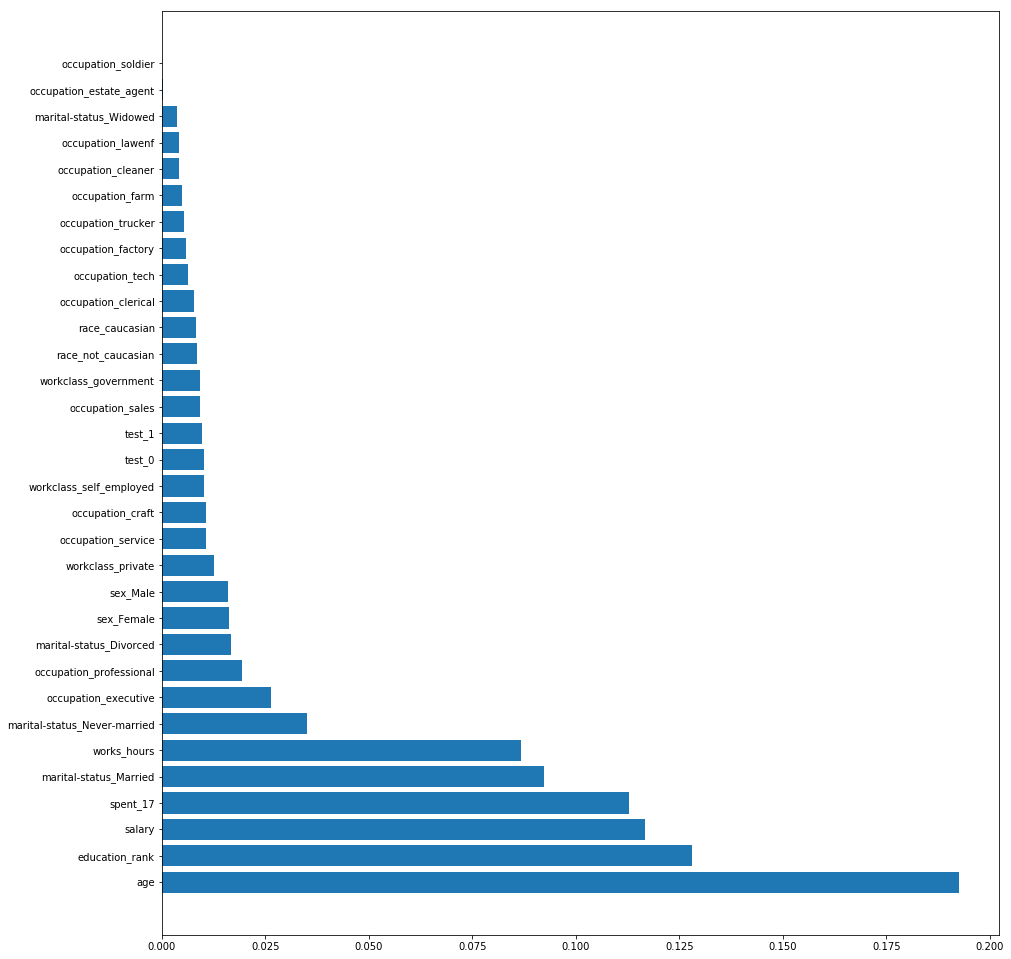

In [53]:
# feature importances
plt.figure(figsize = (15,17))
feature_importance = pd.Series(RF.feature_importances_, index = features.columns)
feature_importance = feature_importance.sort_values(ascending = False)
plt.barh(feature_importance.index, feature_importance)

# Part B: Statistics and Causal Inference

##  Q1: Does Personalised Marketing Change the Spend?

### Is the mean of change of spend of the test group different from 0?

In [27]:
test_group_data = new_data.loc[new_data['test']==1,:]
control_group_data = new_data.loc[new_data['test']==0,:]

In [28]:
# One sample (2-sided) t-test of change of spend of test_group
p_value_t = one_sample_t_test(test_group_data['change_of_spend'])

print('mean of change_of_spend of test group is {}'.format(test_group_data['change_of_spend'].mean()))

p_value_t_2_side = 2 * p_value_t

print('p-value of tesing the mean = 0 is {}'.format(p_value_t_2_side))

mean of change_of_spend of test group is 13.071416440623866
p-value of tesing the mean = 0 is 9.19705044341285e-245


In [29]:
# What about control group?
p_value_t = one_sample_t_test(control_group_data['change_of_spend'])

print('mean of change_of_spend of control group is {}'.format(control_group_data['change_of_spend'].mean()))

p_value_t_2_side = 2 * p_value_t

print('p-value of tesing the mean = 0 is {}'.format(p_value_t_2_side))

mean of change_of_spend of control group is 10.455530120972849
p-value of tesing the mean = 0 is 0.0


In [ ]:
# Both groups have positive mean on the change of spend, 
# hence at this point it is inconclusive whether the marketing campaign would have increase the spend

### Is the distribution of change of spend of the test group different from that of the control group?

In [41]:
# Compare the mean of two groups, however check the variance first

p_value_compare_variance = two_sample_variance_test(control_group_data['change_of_spend'],test_group_data['change_of_spend'])

equal_variance = p_value_compare_variance > 0.05
print('Two groups have equal variance ? {}'.format(equal_variance))

p_value_compare_mean = two_sample_t_test(control_group_data['change_of_spend'],test_group_data['change_of_spend'], equal_var = equal_variance)

print('p-value of tesint equal mean of two groups is {}'.format(p_value_compare_mean))

Two groups have equal variance ? True
p-value of tesint equal mean of two groups is 8.952243937463456e-12


#### Answer

In [ ]:
'''The personalised marketing changed (increased) the mean of the spend, according to the hypothesis test '''

## Q2:  Experiment Set up

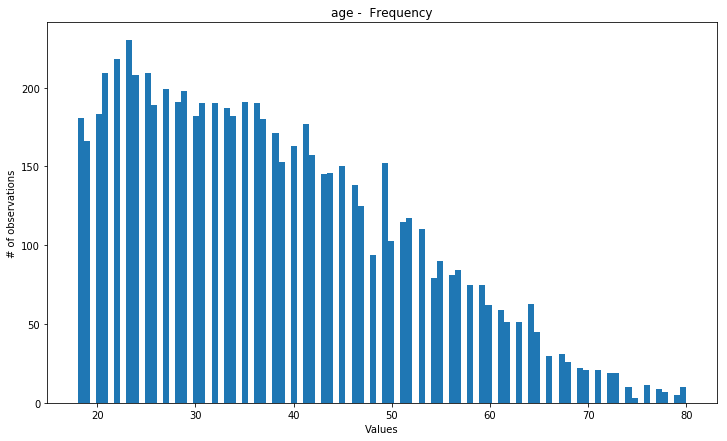

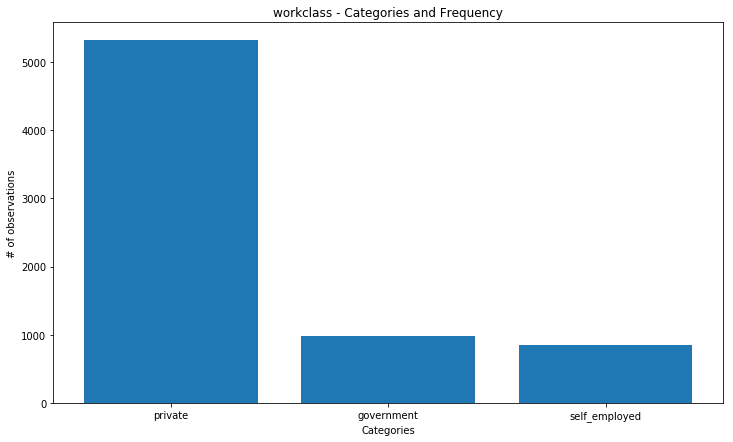

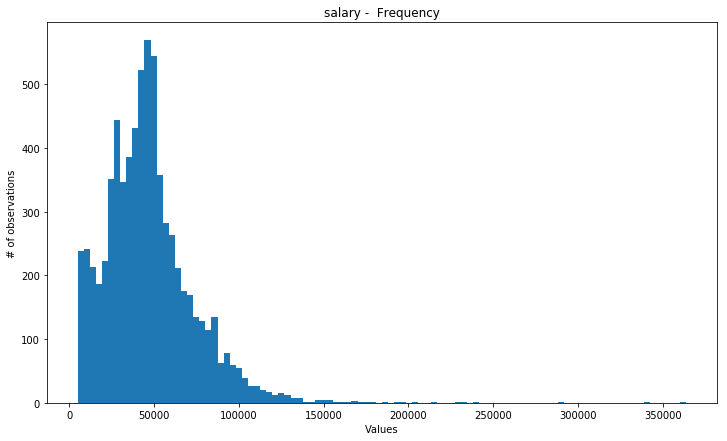

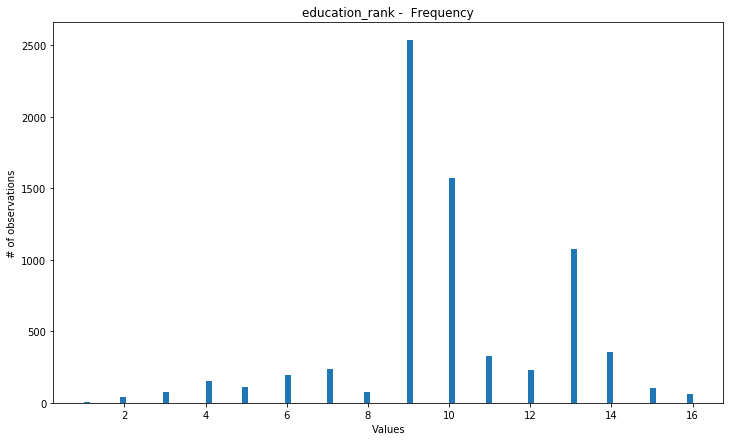

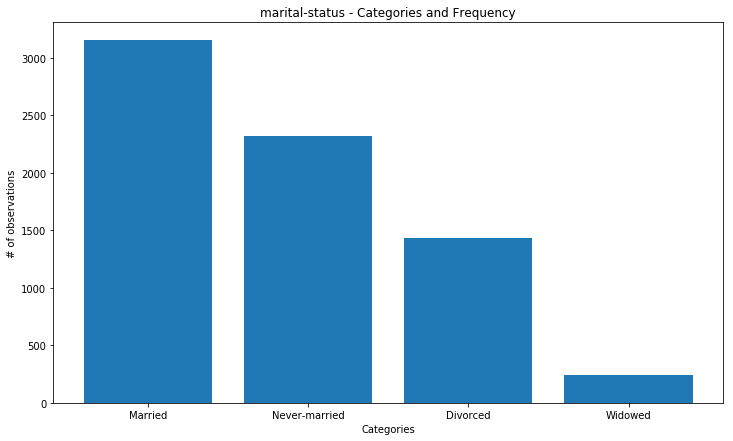

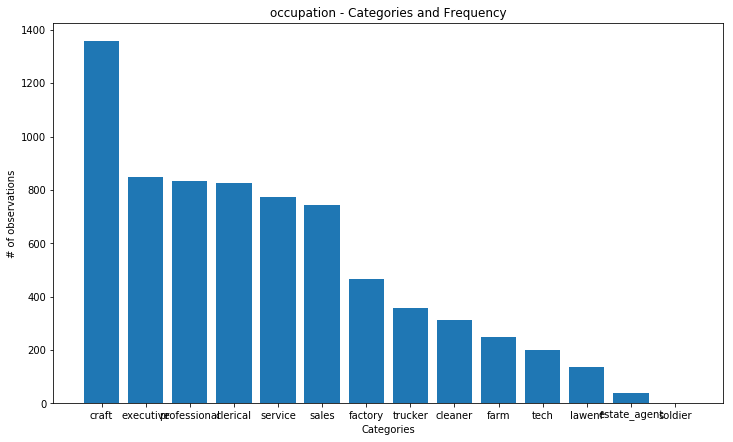

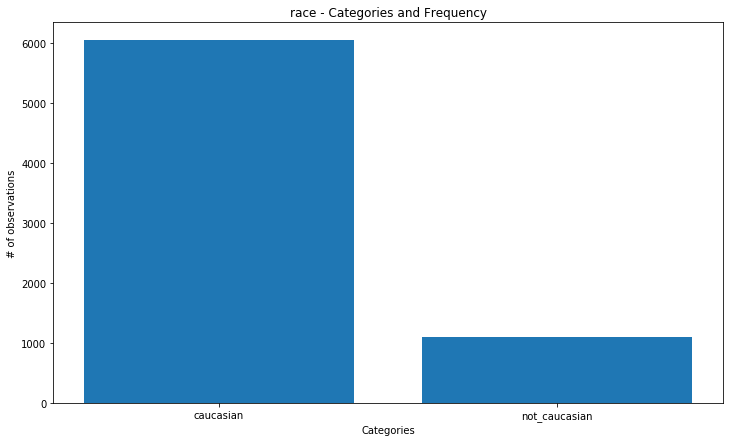

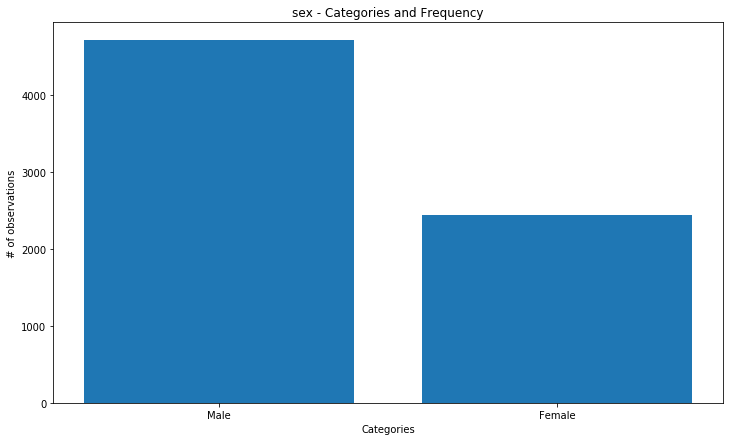

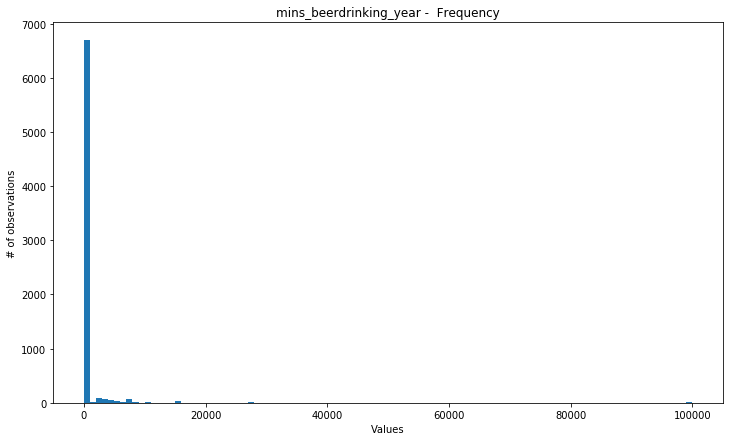

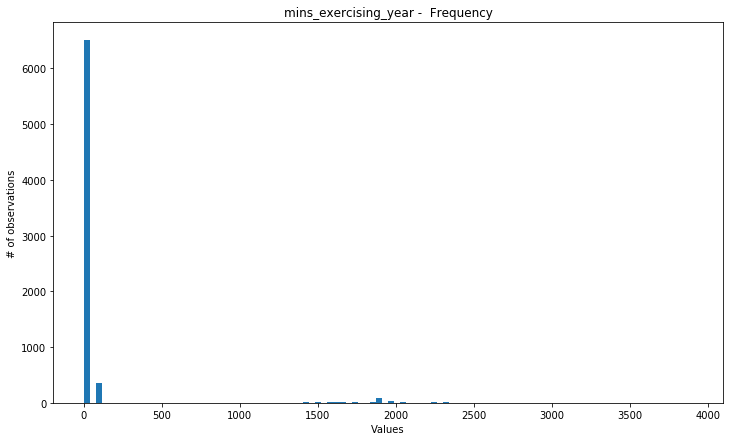

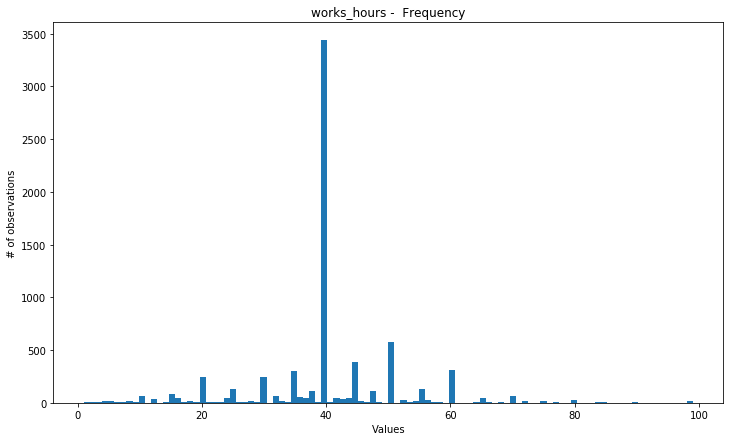

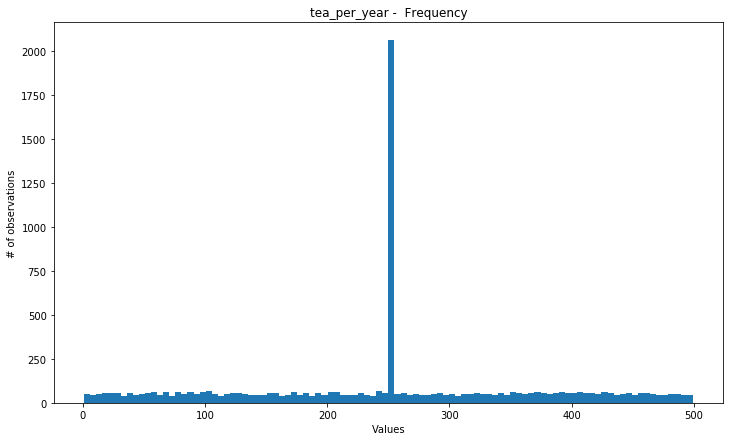

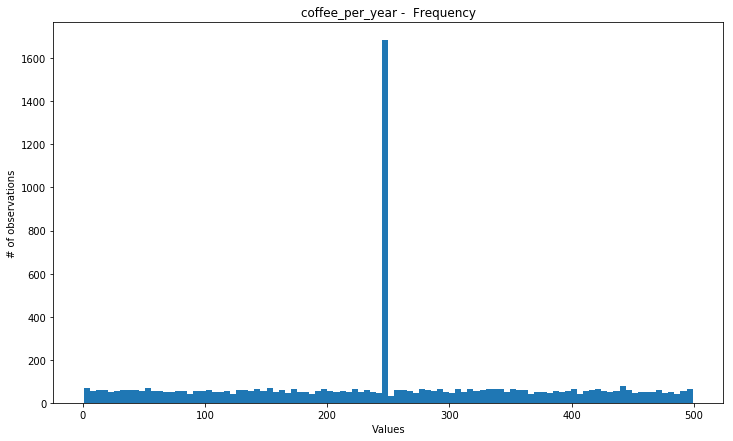

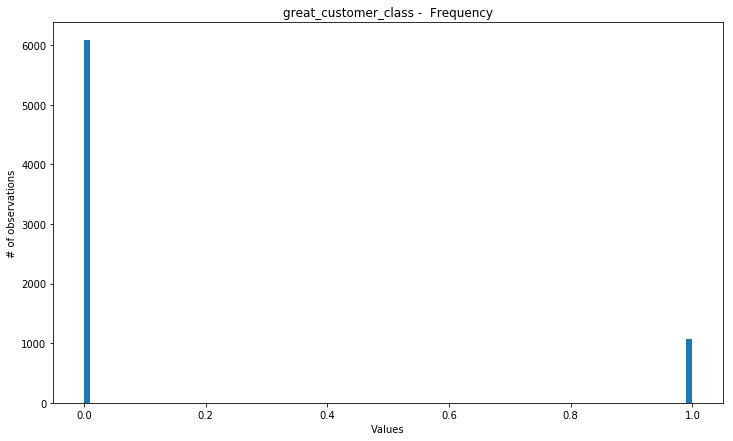

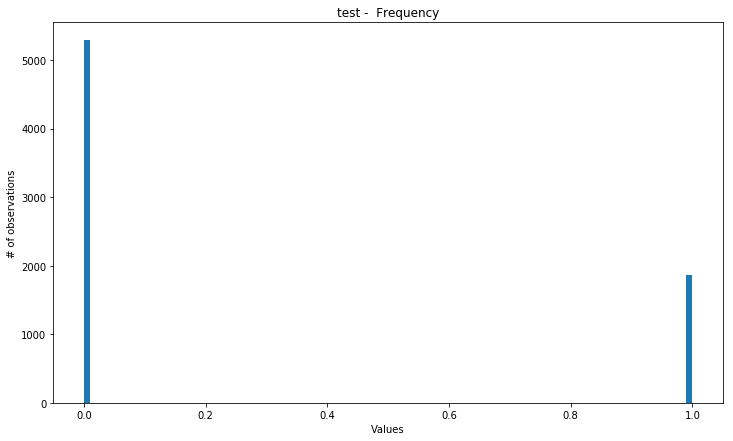

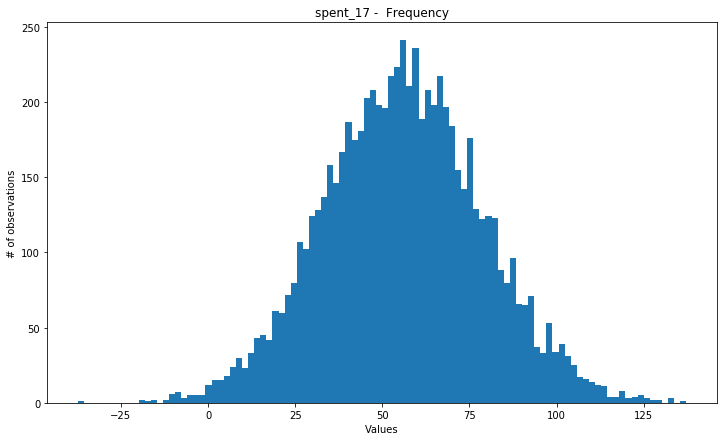

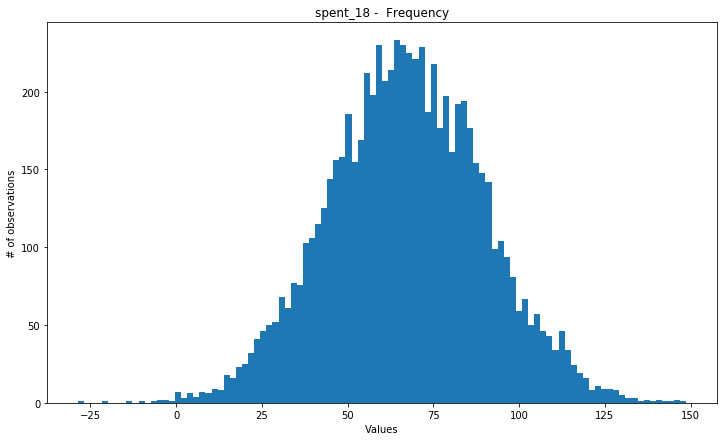

In [32]:
## Look at the distributions of attributes of subject one more time
# Data Distributions Visualisation
category_columns = []
for column in new_data:
    if new_data.dtypes[column] == 'object':
        category_columns.append(column)
        
for column in data:
    if column in category_columns:
        plt.figure(figsize = (12,7))
        plt.title('{} - Categories and Frequency'.format(column))
        plt.xlabel('Categories')
        plt.ylabel('# of observations')
        value_counts = new_data[column].value_counts()
        plt.bar(value_counts.index, value_counts)
        
    else:
        plt.figure(figsize = (12,7))
        plt.title('{} -  Frequency'.format(column))
        plt.xlabel('Values')
        plt.ylabel('# of observations')
        plt.hist(new_data[column], bins = 100)

#### Answer

In [33]:
'''
By looking at the distributions (histograms) of the attribute of the users, a likely that this experiment targeted the 
population of low-volume users (not very engaged with JustEat app). The range of spend in 2017 and 2018 are both relatively low. 
If a regular user order delivery for 20 GBP once in a week on average, then the yearly spend is 1000 GBP at least. However,
the population in this dataset has much lower annual spend. The other covariates behave normally (confirming to the intuition), 
such as age range, salary range, beverage consumption (before imputation), work hours, gender ratio, occupation, work class, etc. 
Once the populatino is decided, there might have been a random number generating procedure that assign random number to the user_id,
then according to a ratio predetermined, assign users to the control and test groups randomly.
'''

'By looking at the distributions (histograms) of the attribute of the users, a likely that this experiment targeted the \npopulation of low-volume users (not very engaged with JustEat app). The range of spend in 2017 and 2018 are both relatively low. \nIf a regular user order delivery for 20 GBP once in a week on average, then the yearly spend is 1000 GBP at least. However,\nthe population in this dataset has much lower annual spend. The other covariates behave normally (confirming to the intuition), \nsuch as age range, salary range, beverage consumption (before imputation), work hours, gender ratio, occupation, work class, etc.\n'

## Q3: Can you think of (a) different way(s) to leverage any suitable pre-experiment data for this test? If so, how are the results affected?


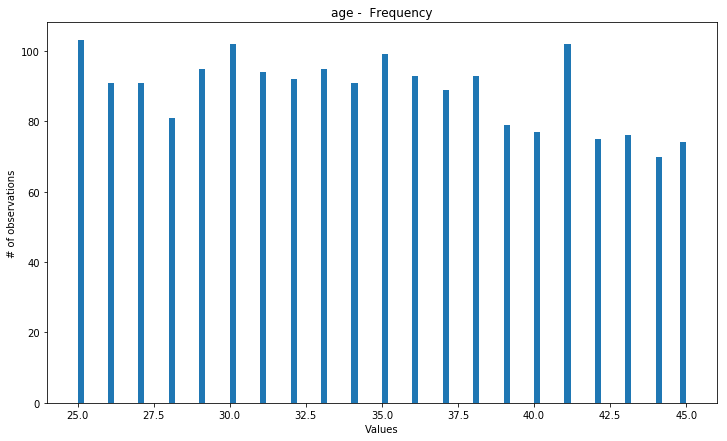

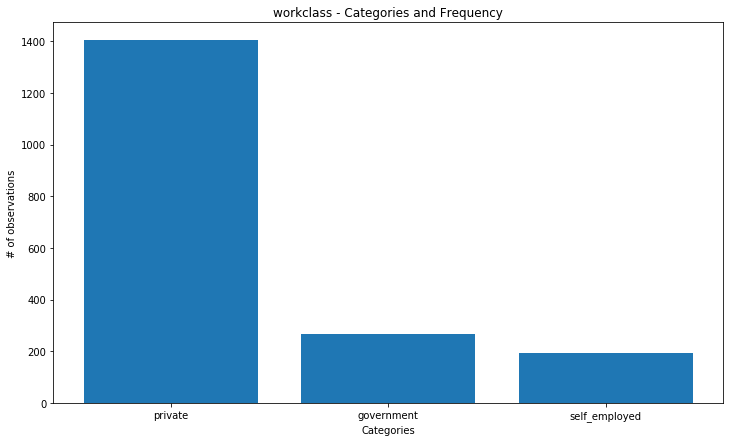

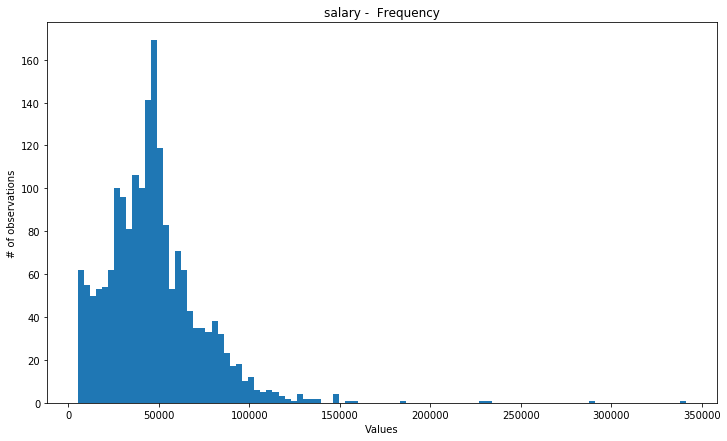

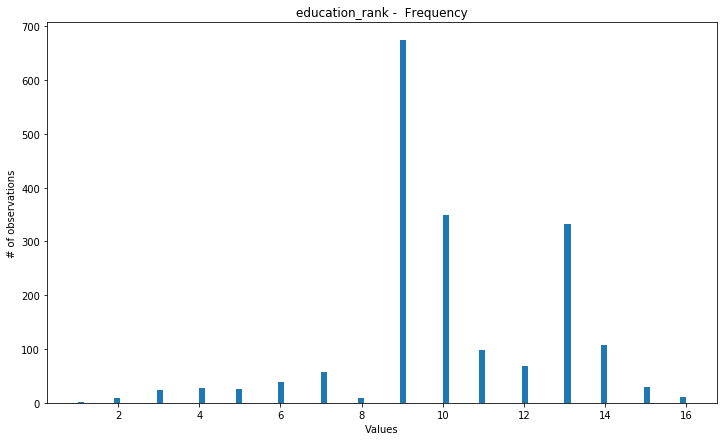

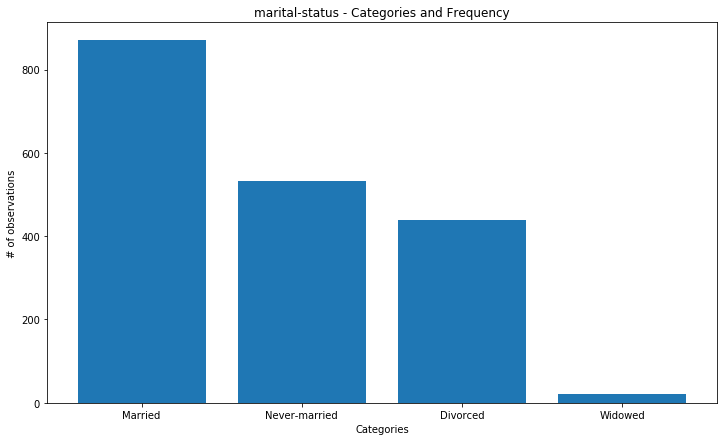

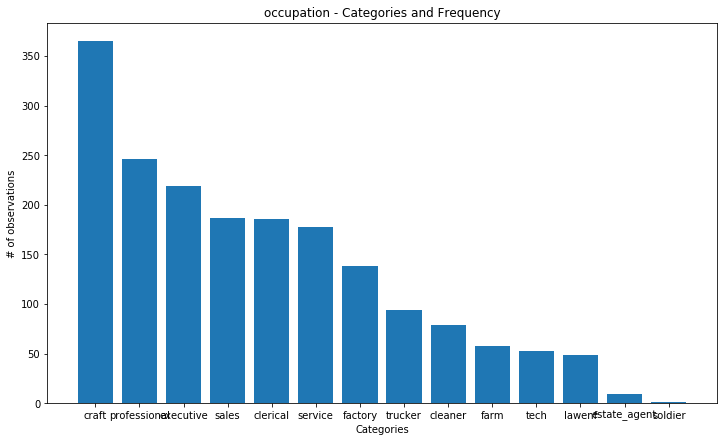

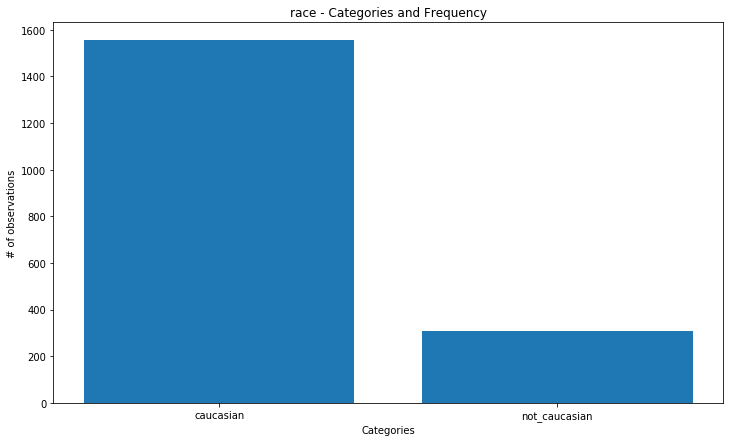

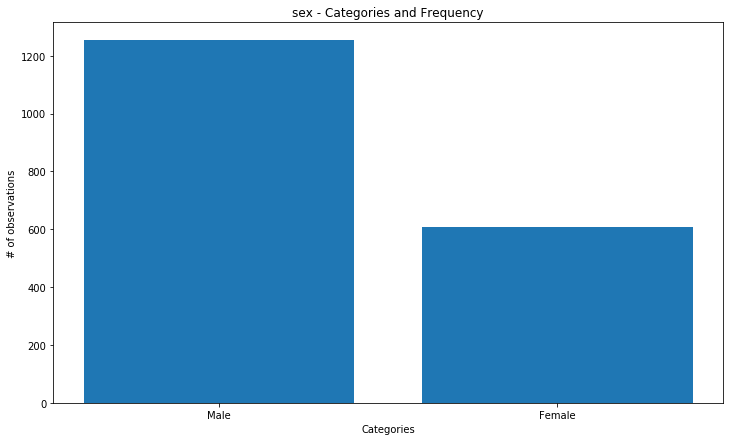

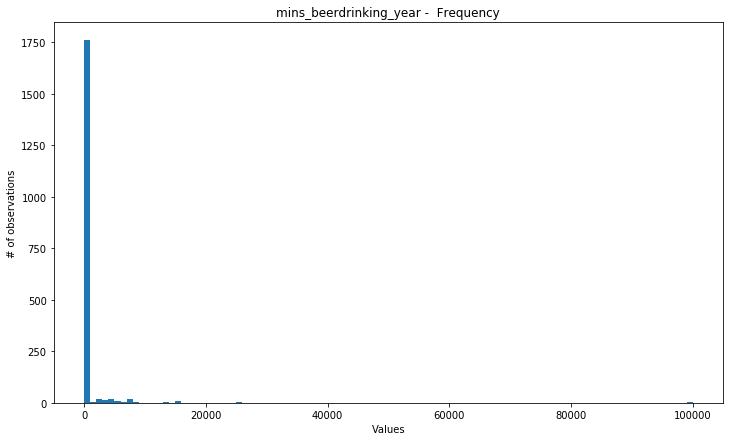

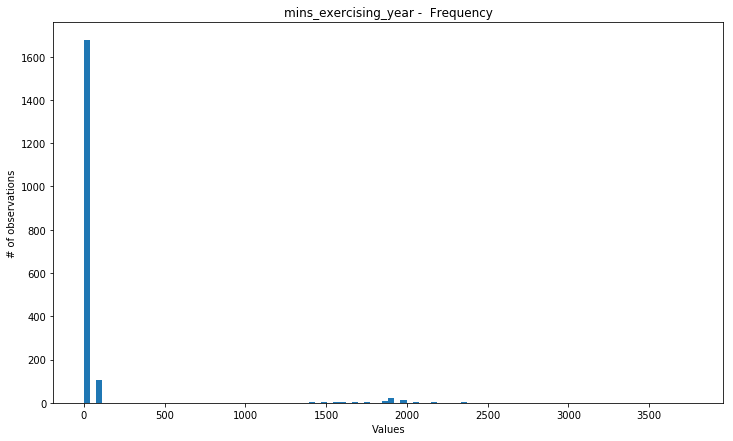

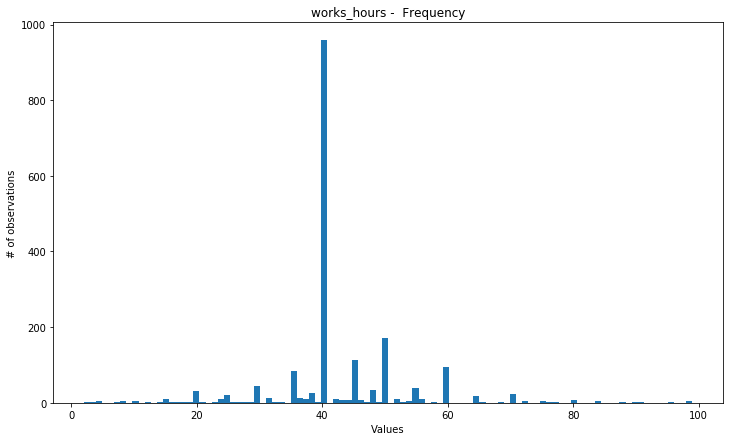

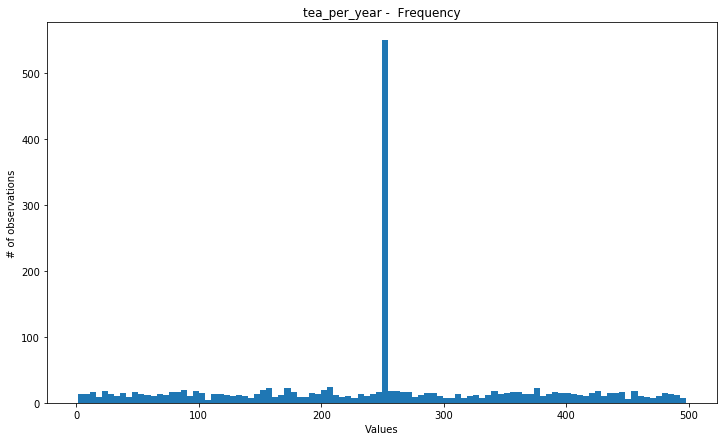

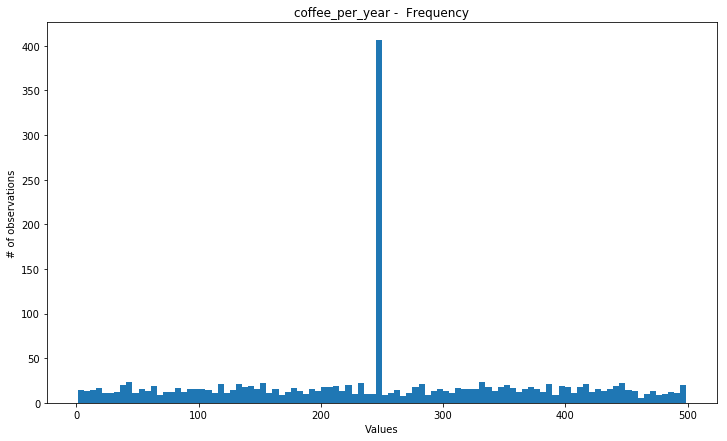

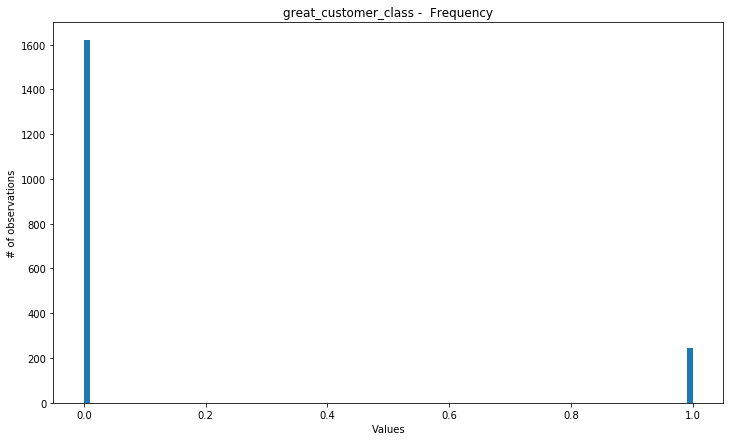

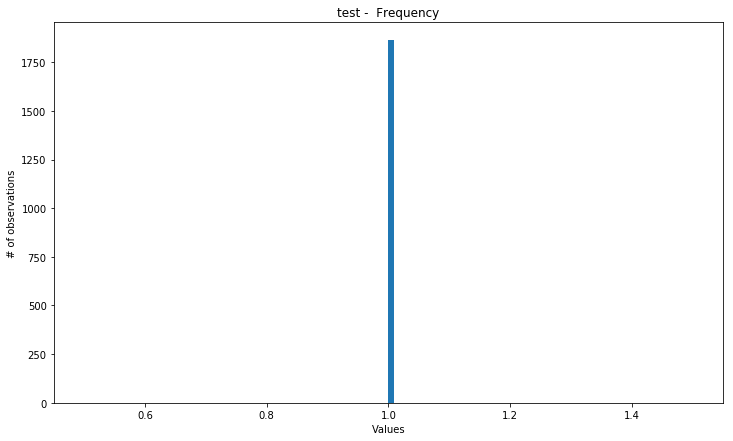

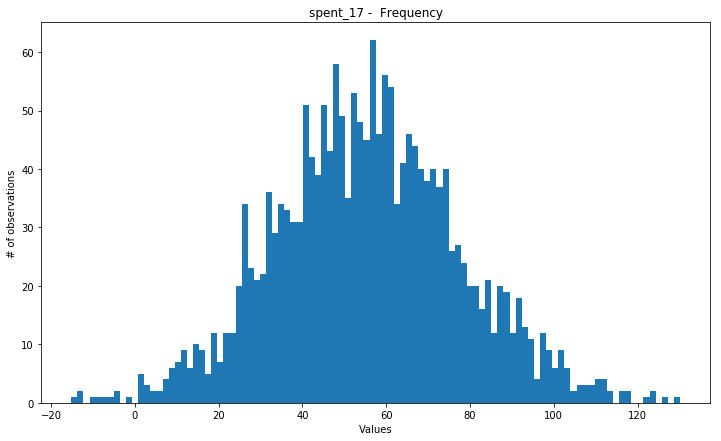

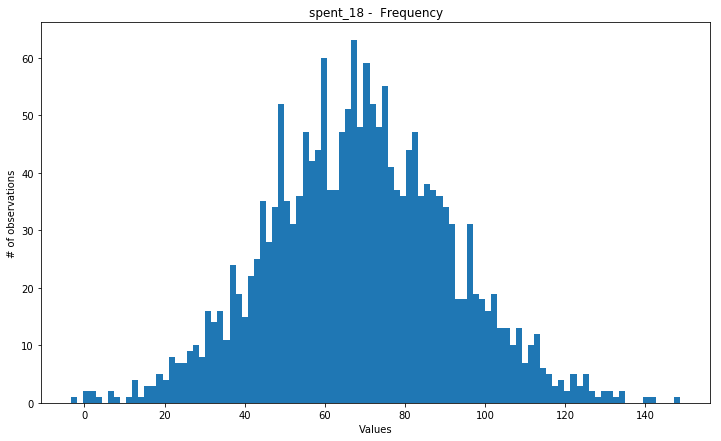

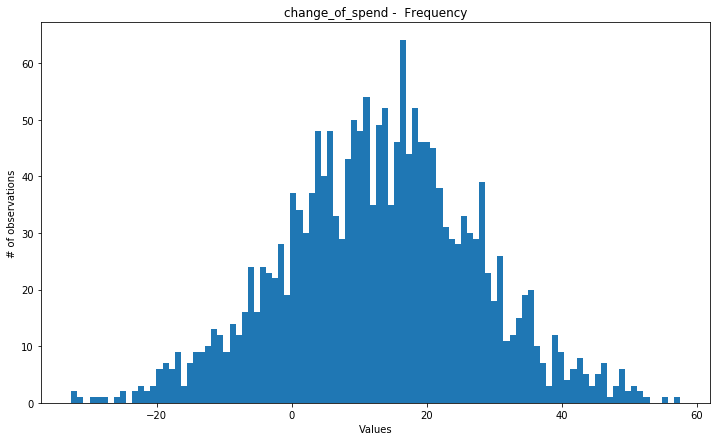

In [34]:
### look at the distribution within test_group_data
for column in test_group_data:
    if column in category_columns:
        plt.figure(figsize = (12,7))
        plt.title('{} - Categories and Frequency'.format(column))
        plt.xlabel('Categories')
        plt.ylabel('# of observations')
        value_counts = test_group_data[column].value_counts()
        plt.bar(value_counts.index, value_counts)
        
    else:
        plt.figure(figsize = (12,7))
        plt.title('{} -  Frequency'.format(column))
        plt.xlabel('Values')
        plt.ylabel('# of observations')
        plt.hist(test_group_data[column], bins = 100)

In [36]:
## test group seems to have a focus on an age range
min_age, max_age = test_group_data['age'].min(), test_group_data['age'].max()

print('min and max of the age of test group are {} and {}'.format(min_age, max_age))

min and max of the age of test group are 25.0 and 45.0


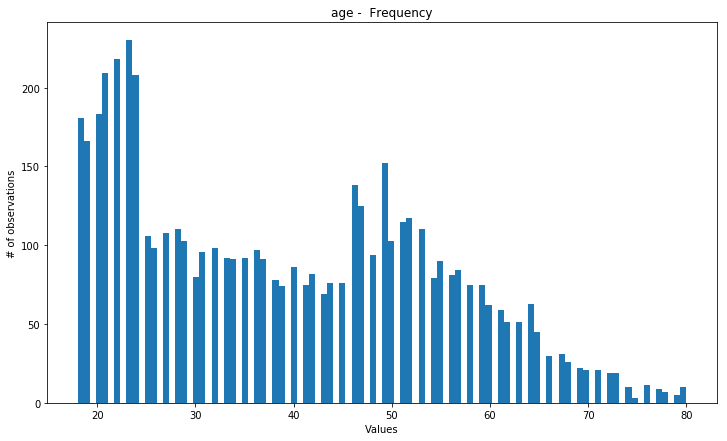

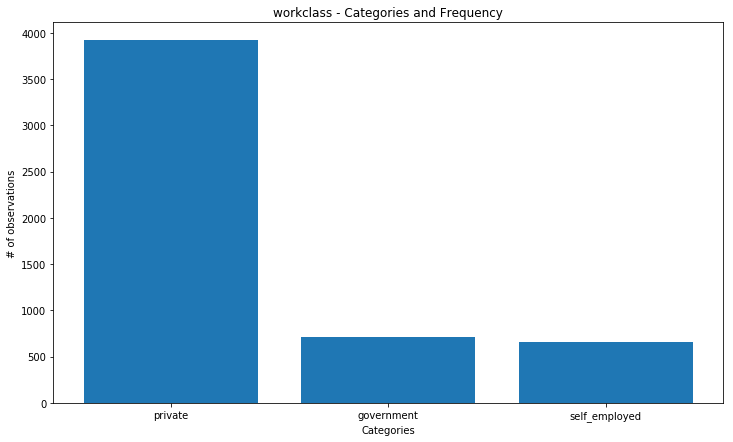

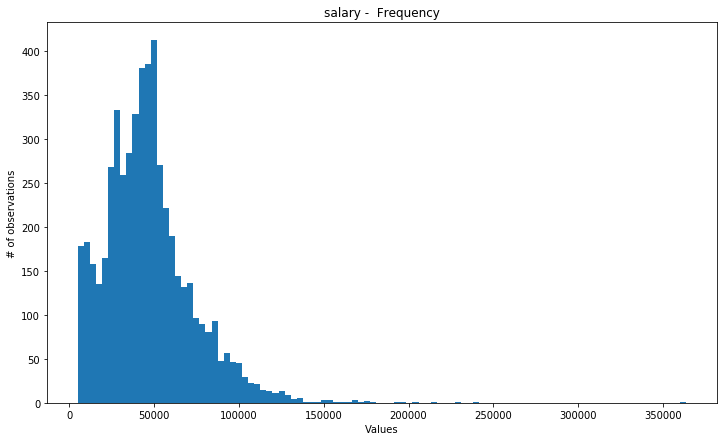

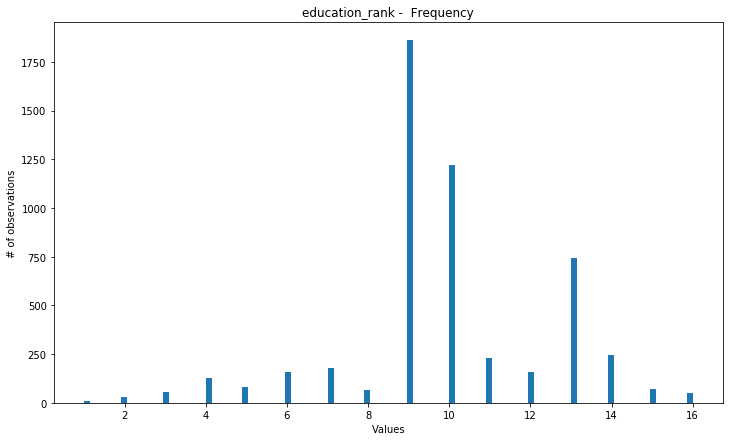

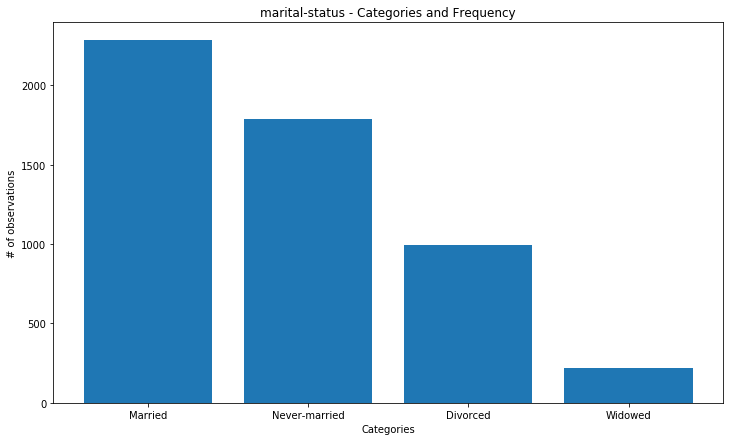

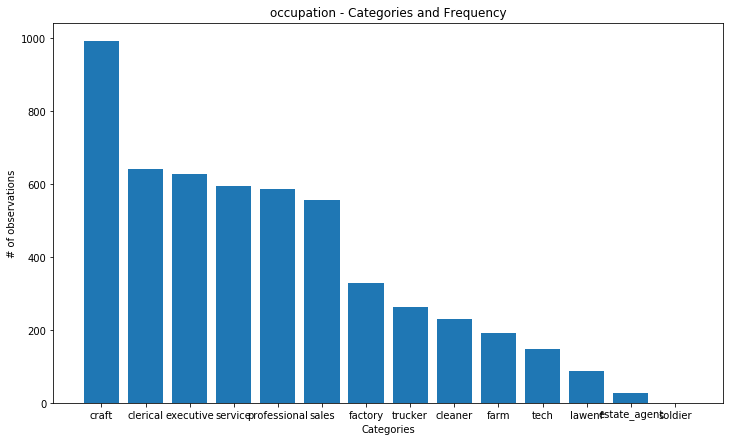

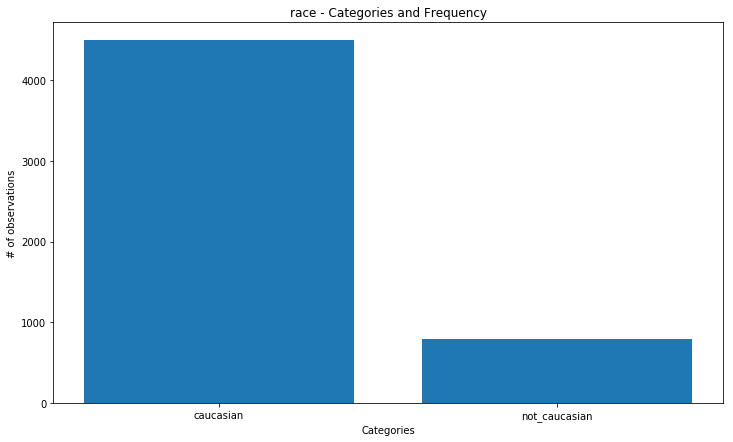

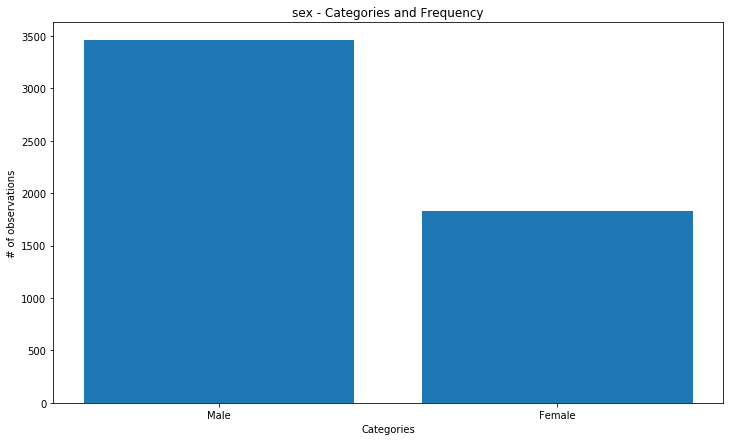

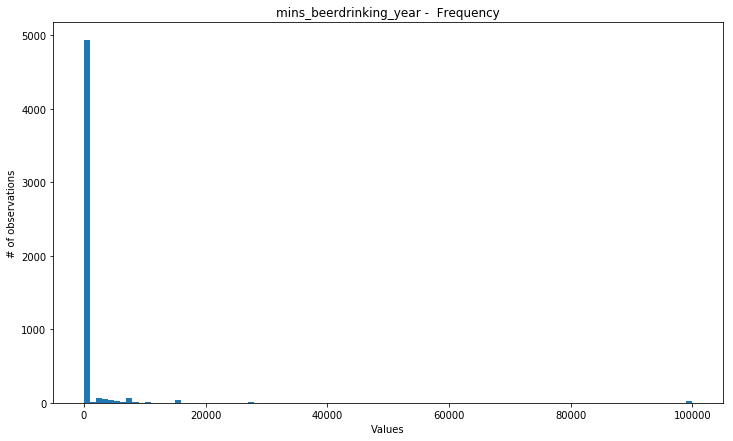

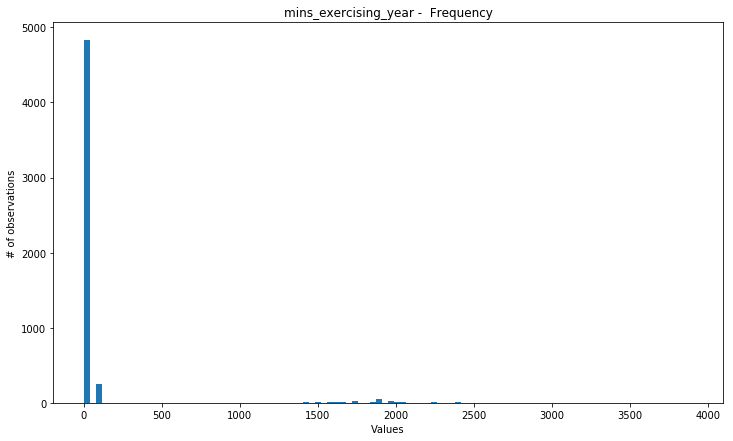

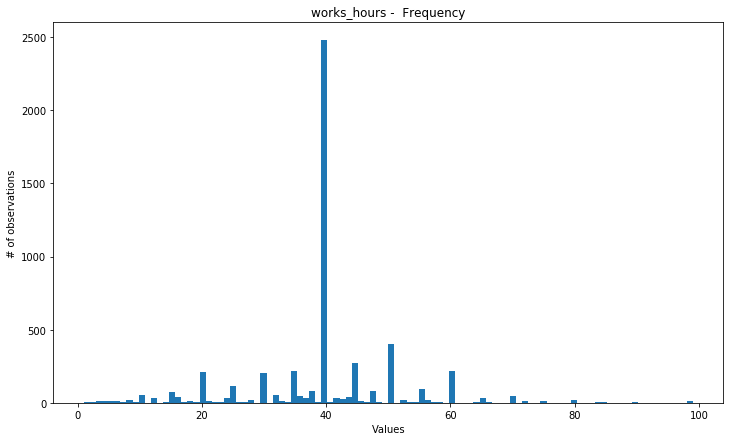

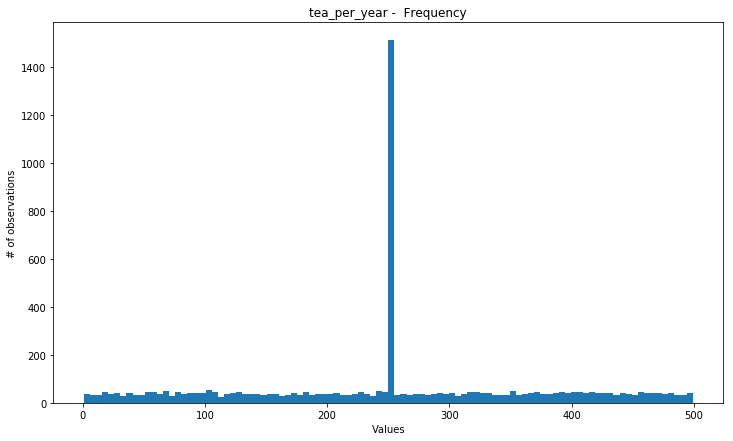

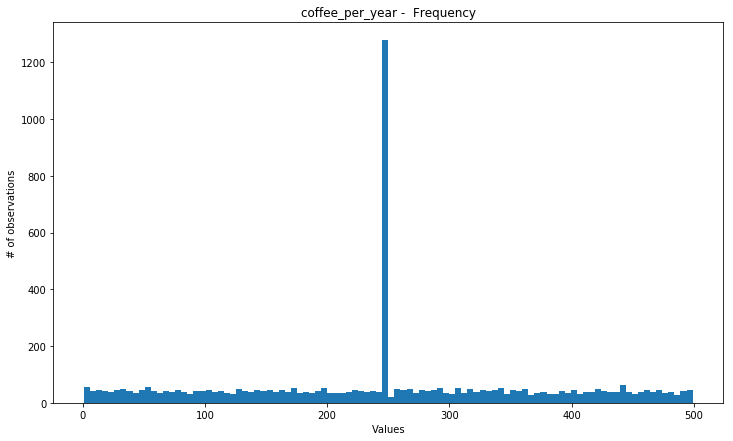

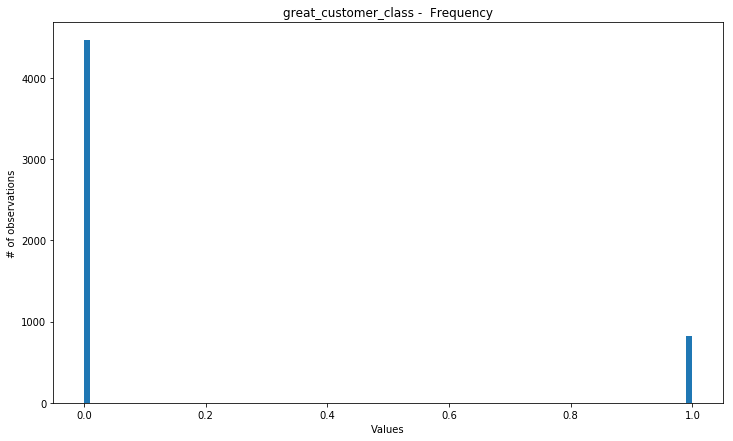

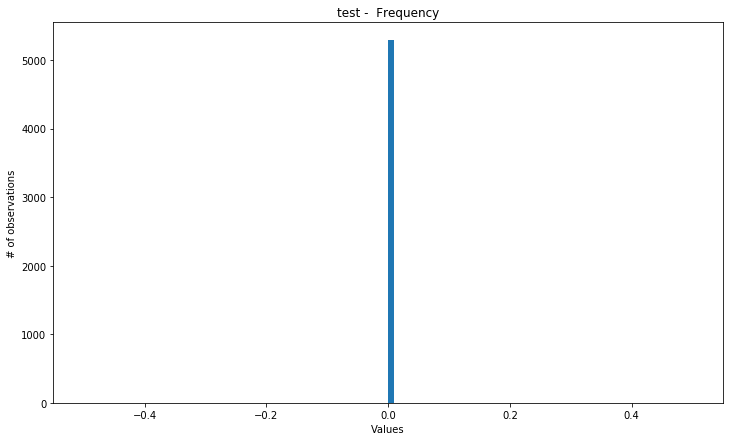

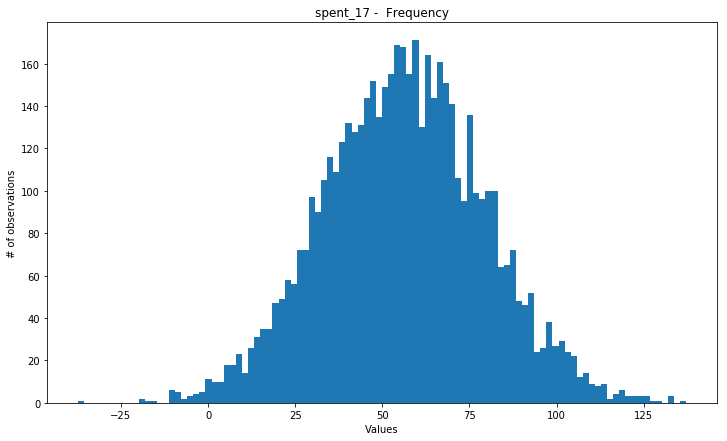

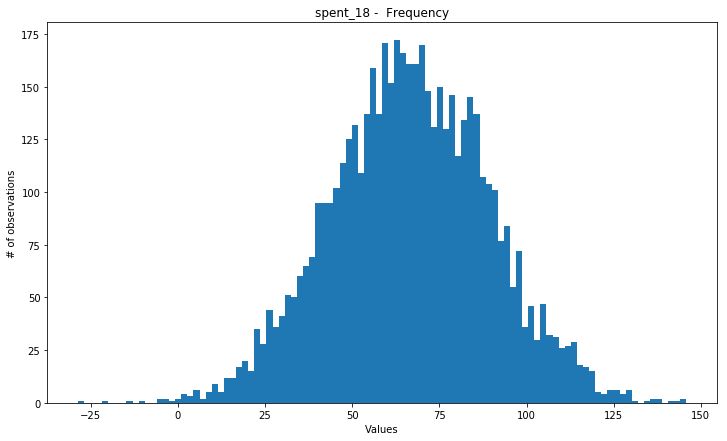

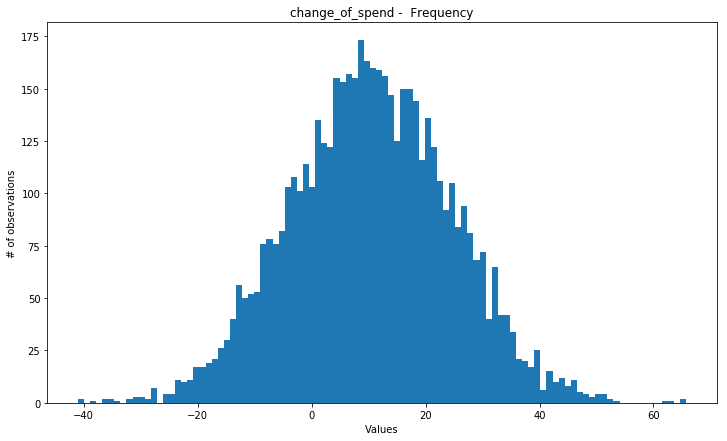

In [37]:
for column in control_group_data:
    if column in category_columns:
        plt.figure(figsize = (12,7))
        plt.title('{} - Categories and Frequency'.format(column))
        plt.xlabel('Categories')
        plt.ylabel('# of observations')
        value_counts = control_group_data[column].value_counts()
        plt.bar(value_counts.index, value_counts)
        
    else:
        plt.figure(figsize = (12,7))
        plt.title('{} -  Frequency'.format(column))
        plt.xlabel('Values')
        plt.ylabel('# of observations')
        plt.hist(control_group_data[column], bins = 100)

mean of change_of_spend of  reduced control group is 10.58507654720835
p-value of tesing the mean = 0 is 1.3859736820680419e-186
Two groups have equal variance ? True
p-value of tesint equal mean of two groups is 9.085083268711262e-08


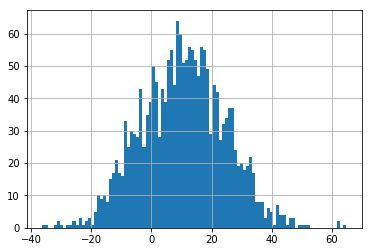

In [42]:
### I will focus on the age range of the control group that is consistent with the test group

reduced_control_group_data = control_group_data.loc[(control_group_data['age']>=25) & (control_group_data['age']<=45),:]
reduced_control_group_data['change_of_spend'].hist(bins = 100)

p_value_t = one_sample_t_test(reduced_control_group_data['change_of_spend'])
print('mean of change_of_spend of  reduced control group is {}'.format(reduced_control_group_data['change_of_spend'].mean()))
p_value_t_2_side = 2 * p_value_t
print('p-value of tesing the mean = 0 is {}'.format(p_value_t_2_side))

# Compare the mean of two groups, however check the variance first
p_value_compare_variance = two_sample_variance_test(reduced_control_group_data['change_of_spend'],test_group_data['change_of_spend'])
equal_variance = p_value_compare_variance > 0.05
print('Two groups have equal variance ? {}'.format(equal_variance))
p_value_compare_mean = two_sample_t_test(reduced_control_group_data['change_of_spend'],test_group_data['change_of_spend'], equal_var = equal_variance)
print('p-value of tesint equal mean of two groups is {}'.format(p_value_compare_mean))

## Q4: Our personalisation experts suggested there might be subgroups among the customers for which the experiment worked better than for the rest. What kind of statistical analysis / causal modelling would you do to investigate this possibility?


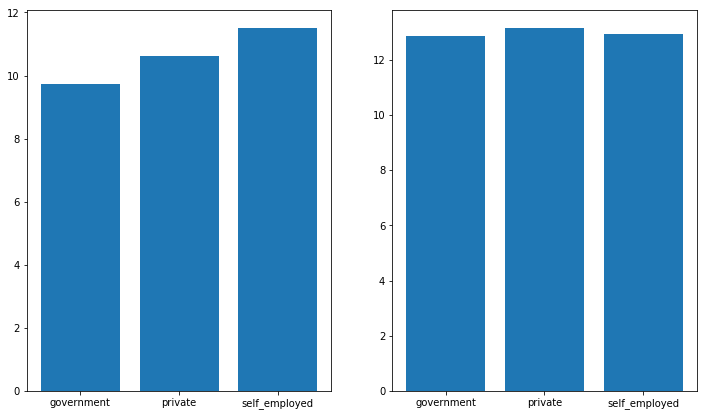

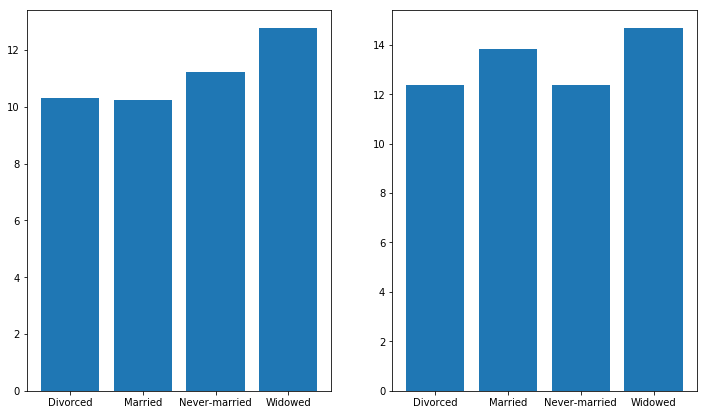

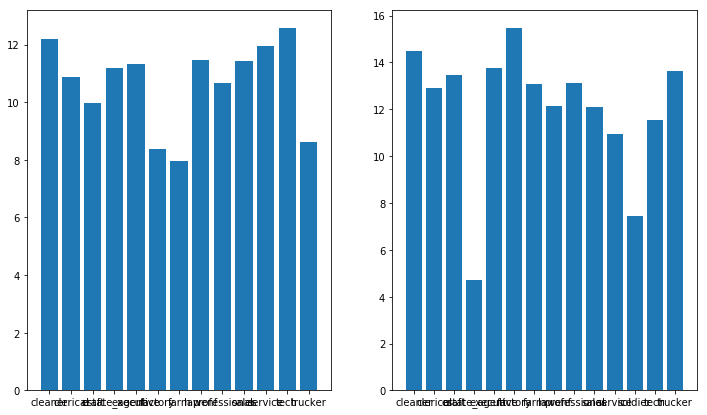

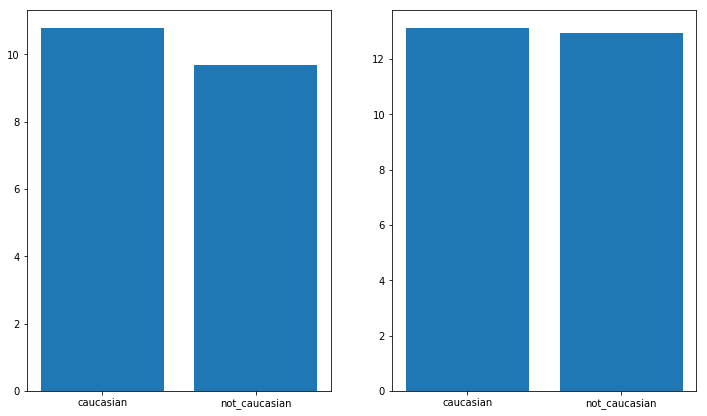

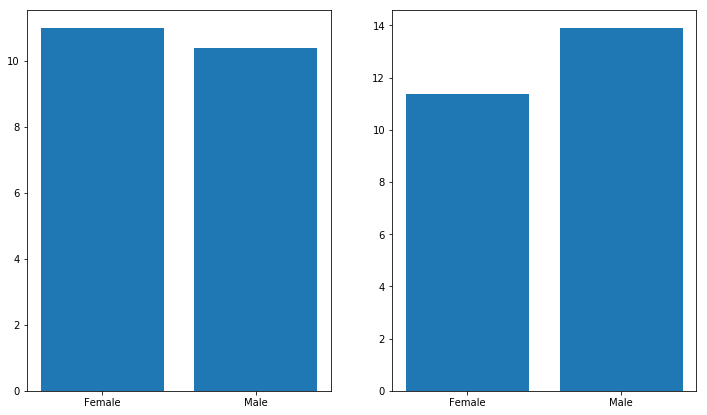

In [49]:
# Analysis of covariance

for factor in category_columns:
    control_mean = reduced_control_group_data.groupby(factor)['change_of_spend'].mean()
    test_mean = test_group_data.groupby(factor)['change_of_spend'].mean()
    plt.figure(figsize = (12,7))
    plt.title(factor)
    plt.subplot(121)
    plt.bar(control_mean.index, control_mean)
    plt.subplot(122)
    plt.bar(test_mean.index, test_mean)

## Q5: Did the campaign affect how many users reported a great customer experience?


In [57]:
## focus on the population which has age ranging from 25-45
reduced_new_data = new_data.loc[(new_data['age']>= 25) & (new_data['age']<45),:]
pd.crosstab(reduced_new_data['test'], reduced_new_data['great_customer_class'])

great_customer_class,0,1
test,,
0,1596,206
1,1569,219


In [60]:
from math import sqrt
# get the ratio of great_customer_class under control and test group
n_control = 1596+206
p_control = 206/ n_control
n_test = 1596+219
p_test = 219/n_test

# Hypothesis: H0: p_control = p_test v.s. H1: p_control != p_test
# compute unpooled standard error
se = sqrt(p_control * (1 - p_control)/n_control + p_test * (1 - p_test)/n_test)
z_stats = (p_test - p_control)/se
print(z_stats)

## according to the Z table, one-sided p-value is 0.2776
two_sided_p_value = 0.2776 * 2
# Cannot reject Null Hypothesis: no statistical evidence to support 'camp'

0.5924701600873856


## Q6: You learn that only about a third of all personalised messages were actually sent, but we don’t know which users received them. All sent messages were read, though. Does this change what you think about the impact of the personalised messages on spending?